In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils

Using Theano backend.


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
batch_size = 128
nb_classes = 10 # 10 Digits from 0 to 9

# Image dimensions
img_rows, img_cols = 28, 28

# Shuffle data and split between train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print("X_train shape = ", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Example label:", y_train[0])
print("One hot encoding: {}".format(Y_train[0, :]))

X_train shape =  (60000, 1, 28, 28)
60000 train samples
10000 test samples
Example label: 5
One hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


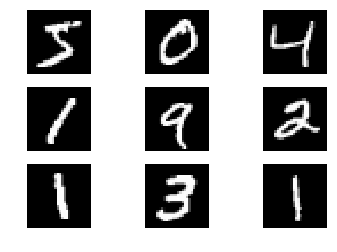

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

In [4]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(1, 28, 28..., padding="same")`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (5, 5))`
  # This is added back by InteractiveShellApp.init_path()


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [13]:
nb_epoch = 2

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print("Test score:", score[0])
print("Test accuracy:", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


  128/60000 [..............................] - ETA: 7:59 - loss: 0.0139 - acc: 1.0000

  256/60000 [..............................] - ETA: 5:53 - loss: 0.0345 - acc: 0.9961

  384/60000 [..............................] - ETA: 5:08 - loss: 0.0429 - acc: 0.9896

  512/60000 [..............................] - ETA: 4:45 - loss: 0.0414 - acc: 0.9922

  640/60000 [..............................] - ETA: 4:32 - loss: 0.0391 - acc: 0.9922

  768/60000 [..............................] - ETA: 4:23 - loss: 0.0372 - acc: 0.9922

  896/60000 [..............................] - ETA: 4:16 - loss: 0.0380 - acc: 0.9911

 1024/60000 [..............................] - ETA: 4:11 - loss: 0.0373 - acc: 0.9912

 1152/60000 [..............................] - ETA: 4:07 - loss: 0.0371 - acc: 0.9913

 1280/60000 [..............................] - ETA: 4:03 - loss: 0.0391 - acc: 0.9906

 1408/60000 [..............................] - ETA: 4:00 - loss: 0.0359 - acc: 0.9915

 1536/60000 [..............................] - ETA: 3:58 - loss: 0.0340 - acc: 0.9922

 1664/60000 [..............................] - ETA: 3:56 - loss: 0.0336 - acc: 0.9922

 1792/60000 [..............................] - ETA: 3:54 - loss: 0.0352 - acc: 0.9911

 1920/60000 [..............................] - ETA: 3:53 - loss: 0.0338 - acc: 0.9917

 2048/60000 [>.............................] - ETA: 3:51 - loss: 0.0342 - acc: 0.9912

 2176/60000 [>.............................] - ETA: 3:49 - loss: 0.0354 - acc: 0.9908

 2304/60000 [>.............................] - ETA: 3:48 - loss: 0.0354 - acc: 0.9900

 2432/60000 [>.............................] - ETA: 3:47 - loss: 0.0342 - acc: 0.9905

 2560/60000 [>.............................] - ETA: 3:45 - loss: 0.0331 - acc: 0.9910

 2688/60000 [>.............................] - ETA: 3:44 - loss: 0.0343 - acc: 0.9896

 2816/60000 [>.............................] - ETA: 3:43 - loss: 0.0350 - acc: 0.9890

 2944/60000 [>.............................] - ETA: 3:42 - loss: 0.0361 - acc: 0.9881

 3072/60000 [>.............................] - ETA: 3:41 - loss: 0.0350 - acc: 0.9886

 3200/60000 [>.............................] - ETA: 3:40 - loss: 0.0351 - acc: 0.9881

 3328/60000 [>.............................] - ETA: 3:39 - loss: 0.0344 - acc: 0.9886

 3456/60000 [>.............................] - ETA: 3:38 - loss: 0.0342 - acc: 0.9887

 3584/60000 [>.............................] - ETA: 3:37 - loss: 0.0334 - acc: 0.9891

 3712/60000 [>.............................] - ETA: 3:37 - loss: 0.0331 - acc: 0.9892

 3840/60000 [>.............................] - ETA: 3:36 - loss: 0.0339 - acc: 0.9893

 3968/60000 [>.............................] - ETA: 3:35 - loss: 0.0336 - acc: 0.9894

 4096/60000 [=>............................] - ETA: 3:34 - loss: 0.0341 - acc: 0.9888

 4224/60000 [=>............................] - ETA: 3:34 - loss: 0.0331 - acc: 0.9891

 4352/60000 [=>............................] - ETA: 3:33 - loss: 0.0343 - acc: 0.9885

 4480/60000 [=>............................] - ETA: 3:32 - loss: 0.0335 - acc: 0.9888

 4608/60000 [=>............................] - ETA: 3:31 - loss: 0.0329 - acc: 0.9889

 4736/60000 [=>............................] - ETA: 3:31 - loss: 0.0336 - acc: 0.9890

 4864/60000 [=>............................] - ETA: 3:30 - loss: 0.0332 - acc: 0.9893

 4992/60000 [=>............................] - ETA: 3:29 - loss: 0.0370 - acc: 0.9890

 5120/60000 [=>............................] - ETA: 3:29 - loss: 0.0376 - acc: 0.9889

 5248/60000 [=>............................] - ETA: 3:28 - loss: 0.0378 - acc: 0.9888

 5376/60000 [=>............................] - ETA: 3:27 - loss: 0.0388 - acc: 0.9887

 5504/60000 [=>............................] - ETA: 3:27 - loss: 0.0389 - acc: 0.9886

 5632/60000 [=>............................] - ETA: 3:26 - loss: 0.0385 - acc: 0.9888

 5760/60000 [=>............................] - ETA: 3:26 - loss: 0.0382 - acc: 0.9889

 5888/60000 [=>............................] - ETA: 3:25 - loss: 0.0388 - acc: 0.9886

 6016/60000 [==>...........................] - ETA: 3:24 - loss: 0.0400 - acc: 0.9882

 6144/60000 [==>...........................] - ETA: 3:24 - loss: 0.0396 - acc: 0.9881

 6272/60000 [==>...........................] - ETA: 3:24 - loss: 0.0401 - acc: 0.9879

 6400/60000 [==>...........................] - ETA: 3:24 - loss: 0.0400 - acc: 0.9877

 6528/60000 [==>...........................] - ETA: 3:24 - loss: 0.0403 - acc: 0.9876

 6656/60000 [==>...........................] - ETA: 3:23 - loss: 0.0403 - acc: 0.9875

 6784/60000 [==>...........................] - ETA: 3:23 - loss: 0.0397 - acc: 0.9878

 6912/60000 [==>...........................] - ETA: 3:22 - loss: 0.0394 - acc: 0.9880

 7040/60000 [==>...........................] - ETA: 3:22 - loss: 0.0397 - acc: 0.9878

 7168/60000 [==>...........................] - ETA: 3:21 - loss: 0.0394 - acc: 0.9879

 7296/60000 [==>...........................] - ETA: 3:20 - loss: 0.0400 - acc: 0.9877

 7424/60000 [==>...........................] - ETA: 3:20 - loss: 0.0399 - acc: 0.9877

 7552/60000 [==>...........................] - ETA: 3:19 - loss: 0.0407 - acc: 0.9874

 7680/60000 [==>...........................] - ETA: 3:19 - loss: 0.0407 - acc: 0.9872

 7808/60000 [==>...........................] - ETA: 3:18 - loss: 0.0404 - acc: 0.9873

 7936/60000 [==>...........................] - ETA: 3:17 - loss: 0.0398 - acc: 0.9875

 8064/60000 [===>..........................] - ETA: 3:17 - loss: 0.0401 - acc: 0.9876

 8192/60000 [===>..........................] - ETA: 3:16 - loss: 0.0402 - acc: 0.9875

 8320/60000 [===>..........................] - ETA: 3:16 - loss: 0.0408 - acc: 0.9874

 8448/60000 [===>..........................] - ETA: 3:15 - loss: 0.0406 - acc: 0.9873

 8576/60000 [===>..........................] - ETA: 3:14 - loss: 0.0400 - acc: 0.9875

 8704/60000 [===>..........................] - ETA: 3:14 - loss: 0.0398 - acc: 0.9875

 8832/60000 [===>..........................] - ETA: 3:14 - loss: 0.0395 - acc: 0.9875

 8960/60000 [===>..........................] - ETA: 3:14 - loss: 0.0403 - acc: 0.9874

 9088/60000 [===>..........................] - ETA: 3:13 - loss: 0.0408 - acc: 0.9873

 9216/60000 [===>..........................] - ETA: 3:13 - loss: 0.0410 - acc: 0.9873

 9344/60000 [===>..........................] - ETA: 3:13 - loss: 0.0405 - acc: 0.9875

 9472/60000 [===>..........................] - ETA: 3:12 - loss: 0.0410 - acc: 0.9873

 9600/60000 [===>..........................] - ETA: 3:12 - loss: 0.0412 - acc: 0.9874

 9728/60000 [===>..........................] - ETA: 3:11 - loss: 0.0412 - acc: 0.9874

 9856/60000 [===>..........................] - ETA: 3:11 - loss: 0.0413 - acc: 0.9873

 9984/60000 [===>..........................] - ETA: 3:10 - loss: 0.0409 - acc: 0.9875

10112/60000 [====>.........................] - ETA: 3:10 - loss: 0.0425 - acc: 0.9873

10240/60000 [====>.........................] - ETA: 3:10 - loss: 0.0425 - acc: 0.9873

10368/60000 [====>.........................] - ETA: 3:09 - loss: 0.0421 - acc: 0.9875

10496/60000 [====>.........................] - ETA: 3:09 - loss: 0.0418 - acc: 0.9875

10624/60000 [====>.........................] - ETA: 3:08 - loss: 0.0427 - acc: 0.9875

10752/60000 [====>.........................] - ETA: 3:08 - loss: 0.0435 - acc: 0.9874

10880/60000 [====>.........................] - ETA: 3:07 - loss: 0.0439 - acc: 0.9873

11008/60000 [====>.........................] - ETA: 3:07 - loss: 0.0437 - acc: 0.9873

11136/60000 [====>.........................] - ETA: 3:06 - loss: 0.0439 - acc: 0.9872

11264/60000 [====>.........................] - ETA: 3:06 - loss: 0.0440 - acc: 0.9871

11392/60000 [====>.........................] - ETA: 3:05 - loss: 0.0437 - acc: 0.9871

11520/60000 [====>.........................] - ETA: 3:05 - loss: 0.0445 - acc: 0.9869

11648/60000 [====>.........................] - ETA: 3:04 - loss: 0.0445 - acc: 0.9870

11776/60000 [====>.........................] - ETA: 3:04 - loss: 0.0446 - acc: 0.9869

11904/60000 [====>.........................] - ETA: 3:03 - loss: 0.0451 - acc: 0.9869

12032/60000 [=====>........................] - ETA: 3:02 - loss: 0.0449 - acc: 0.9870

12160/60000 [=====>........................] - ETA: 3:02 - loss: 0.0446 - acc: 0.9871

12288/60000 [=====>........................] - ETA: 3:01 - loss: 0.0450 - acc: 0.9871

12416/60000 [=====>........................] - ETA: 3:01 - loss: 0.0449 - acc: 0.9872

12544/60000 [=====>........................] - ETA: 3:00 - loss: 0.0451 - acc: 0.9871

12672/60000 [=====>........................] - ETA: 3:00 - loss: 0.0447 - acc: 0.9872

12800/60000 [=====>........................] - ETA: 3:00 - loss: 0.0450 - acc: 0.9872

12928/60000 [=====>........................] - ETA: 3:00 - loss: 0.0447 - acc: 0.9873

13056/60000 [=====>........................] - ETA: 2:59 - loss: 0.0454 - acc: 0.9872

13184/60000 [=====>........................] - ETA: 2:59 - loss: 0.0452 - acc: 0.9873

13312/60000 [=====>........................] - ETA: 2:58 - loss: 0.0455 - acc: 0.9873

13440/60000 [=====>........................] - ETA: 2:58 - loss: 0.0453 - acc: 0.9874

13568/60000 [=====>........................] - ETA: 2:57 - loss: 0.0453 - acc: 0.9873

13696/60000 [=====>........................] - ETA: 2:57 - loss: 0.0455 - acc: 0.9873

13824/60000 [=====>........................] - ETA: 2:56 - loss: 0.0452 - acc: 0.9874

13952/60000 [=====>........................] - ETA: 2:56 - loss: 0.0448 - acc: 0.9875

14080/60000 [======>.......................] - ETA: 2:56 - loss: 0.0447 - acc: 0.9875

14208/60000 [======>.......................] - ETA: 2:55 - loss: 0.0447 - acc: 0.9874

14336/60000 [======>.......................] - ETA: 2:55 - loss: 0.0444 - acc: 0.9875

14464/60000 [======>.......................] - ETA: 2:55 - loss: 0.0443 - acc: 0.9876

14592/60000 [======>.......................] - ETA: 2:54 - loss: 0.0439 - acc: 0.9877

14720/60000 [======>.......................] - ETA: 2:54 - loss: 0.0437 - acc: 0.9877

14848/60000 [======>.......................] - ETA: 2:53 - loss: 0.0438 - acc: 0.9875

14976/60000 [======>.......................] - ETA: 2:53 - loss: 0.0441 - acc: 0.9875

15104/60000 [======>.......................] - ETA: 2:52 - loss: 0.0443 - acc: 0.9874

15232/60000 [======>.......................] - ETA: 2:52 - loss: 0.0442 - acc: 0.9875

15360/60000 [======>.......................] - ETA: 2:51 - loss: 0.0455 - acc: 0.9872

15488/60000 [======>.......................] - ETA: 2:51 - loss: 0.0462 - acc: 0.9871

15616/60000 [======>.......................] - ETA: 2:50 - loss: 0.0460 - acc: 0.9872

15744/60000 [======>.......................] - ETA: 2:50 - loss: 0.0458 - acc: 0.9872

15872/60000 [======>.......................] - ETA: 2:49 - loss: 0.0464 - acc: 0.9872

16000/60000 [=======>......................] - ETA: 2:49 - loss: 0.0464 - acc: 0.9872

16128/60000 [=======>......................] - ETA: 2:48 - loss: 0.0461 - acc: 0.9874

16256/60000 [=======>......................] - ETA: 2:48 - loss: 0.0458 - acc: 0.9875

16384/60000 [=======>......................] - ETA: 2:47 - loss: 0.0458 - acc: 0.9874

16512/60000 [=======>......................] - ETA: 2:47 - loss: 0.0457 - acc: 0.9874

16640/60000 [=======>......................] - ETA: 2:47 - loss: 0.0457 - acc: 0.9874

16768/60000 [=======>......................] - ETA: 2:47 - loss: 0.0456 - acc: 0.9874

16896/60000 [=======>......................] - ETA: 2:46 - loss: 0.0456 - acc: 0.9874

17024/60000 [=======>......................] - ETA: 2:46 - loss: 0.0454 - acc: 0.9874

17152/60000 [=======>......................] - ETA: 2:45 - loss: 0.0451 - acc: 0.9875

17280/60000 [=======>......................] - ETA: 2:44 - loss: 0.0453 - acc: 0.9874

17408/60000 [=======>......................] - ETA: 2:44 - loss: 0.0451 - acc: 0.9875

17536/60000 [=======>......................] - ETA: 2:43 - loss: 0.0449 - acc: 0.9876

17664/60000 [=======>......................] - ETA: 2:43 - loss: 0.0448 - acc: 0.9875

17792/60000 [=======>......................] - ETA: 2:42 - loss: 0.0450 - acc: 0.9876

17920/60000 [=======>......................] - ETA: 2:42 - loss: 0.0448 - acc: 0.9877

18048/60000 [========>.....................] - ETA: 2:41 - loss: 0.0447 - acc: 0.9877

18176/60000 [========>.....................] - ETA: 2:41 - loss: 0.0446 - acc: 0.9877

18304/60000 [========>.....................] - ETA: 2:40 - loss: 0.0448 - acc: 0.9877

18432/60000 [========>.....................] - ETA: 2:40 - loss: 0.0446 - acc: 0.9878

18560/60000 [========>.....................] - ETA: 2:39 - loss: 0.0445 - acc: 0.9878

18688/60000 [========>.....................] - ETA: 2:39 - loss: 0.0449 - acc: 0.9876

18816/60000 [========>.....................] - ETA: 2:38 - loss: 0.0447 - acc: 0.9877

18944/60000 [========>.....................] - ETA: 2:38 - loss: 0.0447 - acc: 0.9876

19072/60000 [========>.....................] - ETA: 2:37 - loss: 0.0457 - acc: 0.9874

19200/60000 [========>.....................] - ETA: 2:37 - loss: 0.0457 - acc: 0.9874

19328/60000 [========>.....................] - ETA: 2:36 - loss: 0.0455 - acc: 0.9875

19456/60000 [========>.....................] - ETA: 2:36 - loss: 0.0455 - acc: 0.9874

19584/60000 [========>.....................] - ETA: 2:35 - loss: 0.0453 - acc: 0.9875

19712/60000 [========>.....................] - ETA: 2:35 - loss: 0.0454 - acc: 0.9875

19840/60000 [========>.....................] - ETA: 2:34 - loss: 0.0457 - acc: 0.9874

19968/60000 [========>.....................] - ETA: 2:34 - loss: 0.0458 - acc: 0.9874

20096/60000 [=========>....................] - ETA: 2:33 - loss: 0.0456 - acc: 0.9874

20224/60000 [=========>....................] - ETA: 2:33 - loss: 0.0455 - acc: 0.9874

20352/60000 [=========>....................] - ETA: 2:32 - loss: 0.0453 - acc: 0.9875

20480/60000 [=========>....................] - ETA: 2:32 - loss: 0.0455 - acc: 0.9875

20608/60000 [=========>....................] - ETA: 2:31 - loss: 0.0457 - acc: 0.9874

20736/60000 [=========>....................] - ETA: 2:31 - loss: 0.0456 - acc: 0.9874

20864/60000 [=========>....................] - ETA: 2:30 - loss: 0.0456 - acc: 0.9873

20992/60000 [=========>....................] - ETA: 2:30 - loss: 0.0454 - acc: 0.9874

21120/60000 [=========>....................] - ETA: 2:29 - loss: 0.0455 - acc: 0.9873

21248/60000 [=========>....................] - ETA: 2:29 - loss: 0.0455 - acc: 0.9872

21376/60000 [=========>....................] - ETA: 2:28 - loss: 0.0456 - acc: 0.9872

21504/60000 [=========>....................] - ETA: 2:28 - loss: 0.0454 - acc: 0.9872

21632/60000 [=========>....................] - ETA: 2:27 - loss: 0.0452 - acc: 0.9873

21760/60000 [=========>....................] - ETA: 2:27 - loss: 0.0450 - acc: 0.9874

21888/60000 [=========>....................] - ETA: 2:26 - loss: 0.0449 - acc: 0.9874

22016/60000 [==========>...................] - ETA: 2:26 - loss: 0.0447 - acc: 0.9875

22144/60000 [==========>...................] - ETA: 2:25 - loss: 0.0447 - acc: 0.9874

22272/60000 [==========>...................] - ETA: 2:25 - loss: 0.0446 - acc: 0.9875

22400/60000 [==========>...................] - ETA: 2:24 - loss: 0.0445 - acc: 0.9875

22528/60000 [==========>...................] - ETA: 2:24 - loss: 0.0446 - acc: 0.9875

22656/60000 [==========>...................] - ETA: 2:23 - loss: 0.0449 - acc: 0.9875

22784/60000 [==========>...................] - ETA: 2:22 - loss: 0.0448 - acc: 0.9875

22912/60000 [==========>...................] - ETA: 2:22 - loss: 0.0448 - acc: 0.9875

23040/60000 [==========>...................] - ETA: 2:21 - loss: 0.0447 - acc: 0.9875

23168/60000 [==========>...................] - ETA: 2:21 - loss: 0.0447 - acc: 0.9876

23296/60000 [==========>...................] - ETA: 2:20 - loss: 0.0445 - acc: 0.9876

23424/60000 [==========>...................] - ETA: 2:20 - loss: 0.0445 - acc: 0.9875

23552/60000 [==========>...................] - ETA: 2:19 - loss: 0.0444 - acc: 0.9876

23680/60000 [==========>...................] - ETA: 2:19 - loss: 0.0442 - acc: 0.9876

23808/60000 [==========>...................] - ETA: 2:18 - loss: 0.0441 - acc: 0.9877

23936/60000 [==========>...................] - ETA: 2:18 - loss: 0.0439 - acc: 0.9878

24064/60000 [===========>..................] - ETA: 2:17 - loss: 0.0440 - acc: 0.9877

24192/60000 [===========>..................] - ETA: 2:17 - loss: 0.0441 - acc: 0.9877

24320/60000 [===========>..................] - ETA: 2:16 - loss: 0.0439 - acc: 0.9878

24448/60000 [===========>..................] - ETA: 2:16 - loss: 0.0437 - acc: 0.9879

24576/60000 [===========>..................] - ETA: 2:15 - loss: 0.0437 - acc: 0.9878

24704/60000 [===========>..................] - ETA: 2:15 - loss: 0.0437 - acc: 0.9878

24832/60000 [===========>..................] - ETA: 2:14 - loss: 0.0436 - acc: 0.9878

24960/60000 [===========>..................] - ETA: 2:14 - loss: 0.0435 - acc: 0.9878

25088/60000 [===========>..................] - ETA: 2:13 - loss: 0.0434 - acc: 0.9879

25216/60000 [===========>..................] - ETA: 2:13 - loss: 0.0433 - acc: 0.9879

25344/60000 [===========>..................] - ETA: 2:12 - loss: 0.0434 - acc: 0.9878

25472/60000 [===========>..................] - ETA: 2:12 - loss: 0.0434 - acc: 0.9878

25600/60000 [===========>..................] - ETA: 2:11 - loss: 0.0435 - acc: 0.9878

25728/60000 [===========>..................] - ETA: 2:11 - loss: 0.0435 - acc: 0.9878

25856/60000 [===========>..................] - ETA: 2:10 - loss: 0.0441 - acc: 0.9875

25984/60000 [===========>..................] - ETA: 2:10 - loss: 0.0441 - acc: 0.9875

26112/60000 [============>.................] - ETA: 2:09 - loss: 0.0440 - acc: 0.9876

26240/60000 [============>.................] - ETA: 2:09 - loss: 0.0439 - acc: 0.9876

26368/60000 [============>.................] - ETA: 2:08 - loss: 0.0439 - acc: 0.9876

26496/60000 [============>.................] - ETA: 2:08 - loss: 0.0442 - acc: 0.9875

26624/60000 [============>.................] - ETA: 2:07 - loss: 0.0440 - acc: 0.9876

26752/60000 [============>.................] - ETA: 2:07 - loss: 0.0441 - acc: 0.9876

26880/60000 [============>.................] - ETA: 2:06 - loss: 0.0445 - acc: 0.9875

27008/60000 [============>.................] - ETA: 2:06 - loss: 0.0443 - acc: 0.9875

27136/60000 [============>.................] - ETA: 2:05 - loss: 0.0444 - acc: 0.9875

27264/60000 [============>.................] - ETA: 2:05 - loss: 0.0447 - acc: 0.9874

27392/60000 [============>.................] - ETA: 2:04 - loss: 0.0446 - acc: 0.9875

27520/60000 [============>.................] - ETA: 2:04 - loss: 0.0444 - acc: 0.9875

27648/60000 [============>.................] - ETA: 2:03 - loss: 0.0445 - acc: 0.9876

27776/60000 [============>.................] - ETA: 2:03 - loss: 0.0448 - acc: 0.9875

27904/60000 [============>.................] - ETA: 2:02 - loss: 0.0450 - acc: 0.9874

28032/60000 [=============>................] - ETA: 2:02 - loss: 0.0450 - acc: 0.9874

28160/60000 [=============>................] - ETA: 2:01 - loss: 0.0452 - acc: 0.9874

28288/60000 [=============>................] - ETA: 2:01 - loss: 0.0451 - acc: 0.9874

28416/60000 [=============>................] - ETA: 2:00 - loss: 0.0449 - acc: 0.9874

28544/60000 [=============>................] - ETA: 2:00 - loss: 0.0448 - acc: 0.9874

28672/60000 [=============>................] - ETA: 1:59 - loss: 0.0448 - acc: 0.9874

28800/60000 [=============>................] - ETA: 1:59 - loss: 0.0448 - acc: 0.9875

28928/60000 [=============>................] - ETA: 1:58 - loss: 0.0451 - acc: 0.9875

29056/60000 [=============>................] - ETA: 1:58 - loss: 0.0450 - acc: 0.9875

29184/60000 [=============>................] - ETA: 1:57 - loss: 0.0448 - acc: 0.9876

29312/60000 [=============>................] - ETA: 1:57 - loss: 0.0448 - acc: 0.9875

29440/60000 [=============>................] - ETA: 1:56 - loss: 0.0446 - acc: 0.9876

29568/60000 [=============>................] - ETA: 1:56 - loss: 0.0446 - acc: 0.9876

29696/60000 [=============>................] - ETA: 1:55 - loss: 0.0445 - acc: 0.9876

29824/60000 [=============>................] - ETA: 1:55 - loss: 0.0445 - acc: 0.9876

29952/60000 [=============>................] - ETA: 1:54 - loss: 0.0444 - acc: 0.9875

30080/60000 [==============>...............] - ETA: 1:54 - loss: 0.0443 - acc: 0.9876

30208/60000 [==============>...............] - ETA: 1:53 - loss: 0.0443 - acc: 0.9876

30336/60000 [==============>...............] - ETA: 1:53 - loss: 0.0444 - acc: 0.9875

30464/60000 [==============>...............] - ETA: 1:52 - loss: 0.0443 - acc: 0.9876

30592/60000 [==============>...............] - ETA: 1:52 - loss: 0.0442 - acc: 0.9876

30720/60000 [==============>...............] - ETA: 1:51 - loss: 0.0441 - acc: 0.9876

30848/60000 [==============>...............] - ETA: 1:51 - loss: 0.0440 - acc: 0.9876

30976/60000 [==============>...............] - ETA: 1:50 - loss: 0.0439 - acc: 0.9877

31104/60000 [==============>...............] - ETA: 1:50 - loss: 0.0443 - acc: 0.9876

31232/60000 [==============>...............] - ETA: 1:49 - loss: 0.0443 - acc: 0.9875

31360/60000 [==============>...............] - ETA: 1:49 - loss: 0.0445 - acc: 0.9875

31488/60000 [==============>...............] - ETA: 1:48 - loss: 0.0444 - acc: 0.9875

31616/60000 [==============>...............] - ETA: 1:48 - loss: 0.0444 - acc: 0.9875

31744/60000 [==============>...............] - ETA: 1:47 - loss: 0.0449 - acc: 0.9874

31872/60000 [==============>...............] - ETA: 1:47 - loss: 0.0449 - acc: 0.9874

32000/60000 [===============>..............] - ETA: 1:46 - loss: 0.0448 - acc: 0.9874

32128/60000 [===============>..............] - ETA: 1:46 - loss: 0.0448 - acc: 0.9874

32256/60000 [===============>..............] - ETA: 1:45 - loss: 0.0449 - acc: 0.9874

32384/60000 [===============>..............] - ETA: 1:45 - loss: 0.0449 - acc: 0.9874

32512/60000 [===============>..............] - ETA: 1:44 - loss: 0.0449 - acc: 0.9874

32640/60000 [===============>..............] - ETA: 1:44 - loss: 0.0449 - acc: 0.9874

32768/60000 [===============>..............] - ETA: 1:43 - loss: 0.0448 - acc: 0.9875

32896/60000 [===============>..............] - ETA: 1:43 - loss: 0.0448 - acc: 0.9874

33024/60000 [===============>..............] - ETA: 1:42 - loss: 0.0447 - acc: 0.9875

33152/60000 [===============>..............] - ETA: 1:42 - loss: 0.0447 - acc: 0.9875

33280/60000 [===============>..............] - ETA: 1:41 - loss: 0.0446 - acc: 0.9875

33408/60000 [===============>..............] - ETA: 1:41 - loss: 0.0447 - acc: 0.9874

33536/60000 [===============>..............] - ETA: 1:40 - loss: 0.0447 - acc: 0.9874

33664/60000 [===============>..............] - ETA: 1:40 - loss: 0.0449 - acc: 0.9874

33792/60000 [===============>..............] - ETA: 1:39 - loss: 0.0448 - acc: 0.9874

33920/60000 [===============>..............] - ETA: 1:39 - loss: 0.0449 - acc: 0.9874

34048/60000 [================>.............] - ETA: 1:38 - loss: 0.0449 - acc: 0.9874

34176/60000 [================>.............] - ETA: 1:38 - loss: 0.0448 - acc: 0.9874

34304/60000 [================>.............] - ETA: 1:37 - loss: 0.0447 - acc: 0.9874

34432/60000 [================>.............] - ETA: 1:37 - loss: 0.0446 - acc: 0.9875

34560/60000 [================>.............] - ETA: 1:36 - loss: 0.0445 - acc: 0.9875

34688/60000 [================>.............] - ETA: 1:36 - loss: 0.0444 - acc: 0.9875

34816/60000 [================>.............] - ETA: 1:35 - loss: 0.0443 - acc: 0.9876

34944/60000 [================>.............] - ETA: 1:35 - loss: 0.0442 - acc: 0.9876

35072/60000 [================>.............] - ETA: 1:34 - loss: 0.0441 - acc: 0.9876

35200/60000 [================>.............] - ETA: 1:34 - loss: 0.0441 - acc: 0.9876

35328/60000 [================>.............] - ETA: 1:33 - loss: 0.0441 - acc: 0.9876

35456/60000 [================>.............] - ETA: 1:33 - loss: 0.0442 - acc: 0.9876

35584/60000 [================>.............] - ETA: 1:32 - loss: 0.0442 - acc: 0.9876

35712/60000 [================>.............] - ETA: 1:32 - loss: 0.0442 - acc: 0.9876

35840/60000 [================>.............] - ETA: 1:31 - loss: 0.0444 - acc: 0.9876

35968/60000 [================>.............] - ETA: 1:31 - loss: 0.0443 - acc: 0.9876

36096/60000 [=================>............] - ETA: 1:30 - loss: 0.0444 - acc: 0.9875

36224/60000 [=================>............] - ETA: 1:30 - loss: 0.0444 - acc: 0.9875

36352/60000 [=================>............] - ETA: 1:29 - loss: 0.0442 - acc: 0.9876

36480/60000 [=================>............] - ETA: 1:29 - loss: 0.0442 - acc: 0.9876

36608/60000 [=================>............] - ETA: 1:28 - loss: 0.0441 - acc: 0.9876

36736/60000 [=================>............] - ETA: 1:28 - loss: 0.0441 - acc: 0.9876

36864/60000 [=================>............] - ETA: 1:27 - loss: 0.0441 - acc: 0.9875

36992/60000 [=================>............] - ETA: 1:27 - loss: 0.0440 - acc: 0.9876

37120/60000 [=================>............] - ETA: 1:26 - loss: 0.0440 - acc: 0.9876

37248/60000 [=================>............] - ETA: 1:26 - loss: 0.0438 - acc: 0.9876

37376/60000 [=================>............] - ETA: 1:26 - loss: 0.0438 - acc: 0.9877

37504/60000 [=================>............] - ETA: 1:25 - loss: 0.0436 - acc: 0.9877

37632/60000 [=================>............] - ETA: 1:25 - loss: 0.0436 - acc: 0.9877

37760/60000 [=================>............] - ETA: 1:24 - loss: 0.0440 - acc: 0.9877

37888/60000 [=================>............] - ETA: 1:24 - loss: 0.0439 - acc: 0.9877

38016/60000 [==================>...........] - ETA: 1:23 - loss: 0.0438 - acc: 0.9877

38144/60000 [==================>...........] - ETA: 1:23 - loss: 0.0437 - acc: 0.9878

38272/60000 [==================>...........] - ETA: 1:23 - loss: 0.0437 - acc: 0.9878

38400/60000 [==================>...........] - ETA: 1:22 - loss: 0.0436 - acc: 0.9878

38528/60000 [==================>...........] - ETA: 1:22 - loss: 0.0435 - acc: 0.9878

38656/60000 [==================>...........] - ETA: 1:22 - loss: 0.0435 - acc: 0.9878

38784/60000 [==================>...........] - ETA: 1:21 - loss: 0.0434 - acc: 0.9878

38912/60000 [==================>...........] - ETA: 1:21 - loss: 0.0434 - acc: 0.9878

39040/60000 [==================>...........] - ETA: 1:20 - loss: 0.0436 - acc: 0.9877

39168/60000 [==================>...........] - ETA: 1:20 - loss: 0.0436 - acc: 0.9877

39296/60000 [==================>...........] - ETA: 1:20 - loss: 0.0436 - acc: 0.9877

39424/60000 [==================>...........] - ETA: 1:19 - loss: 0.0435 - acc: 0.9877

39552/60000 [==================>...........] - ETA: 1:19 - loss: 0.0434 - acc: 0.9878

39680/60000 [==================>...........] - ETA: 1:18 - loss: 0.0436 - acc: 0.9877

39808/60000 [==================>...........] - ETA: 1:18 - loss: 0.0435 - acc: 0.9877

39936/60000 [==================>...........] - ETA: 1:17 - loss: 0.0434 - acc: 0.9878

40064/60000 [===================>..........] - ETA: 1:17 - loss: 0.0433 - acc: 0.9878

40192/60000 [===================>..........] - ETA: 1:16 - loss: 0.0432 - acc: 0.9878

40320/60000 [===================>..........] - ETA: 1:16 - loss: 0.0432 - acc: 0.9878

40448/60000 [===================>..........] - ETA: 1:15 - loss: 0.0431 - acc: 0.9878

40576/60000 [===================>..........] - ETA: 1:15 - loss: 0.0431 - acc: 0.9878

40704/60000 [===================>..........] - ETA: 1:14 - loss: 0.0430 - acc: 0.9879

40832/60000 [===================>..........] - ETA: 1:14 - loss: 0.0430 - acc: 0.9879

40960/60000 [===================>..........] - ETA: 1:13 - loss: 0.0430 - acc: 0.9879

41088/60000 [===================>..........] - ETA: 1:13 - loss: 0.0429 - acc: 0.9879

41216/60000 [===================>..........] - ETA: 1:12 - loss: 0.0428 - acc: 0.9879

41344/60000 [===================>..........] - ETA: 1:12 - loss: 0.0427 - acc: 0.9879

41472/60000 [===================>..........] - ETA: 1:11 - loss: 0.0429 - acc: 0.9879

41600/60000 [===================>..........] - ETA: 1:11 - loss: 0.0429 - acc: 0.9879

41728/60000 [===================>..........] - ETA: 1:10 - loss: 0.0428 - acc: 0.9879

41856/60000 [===================>..........] - ETA: 1:10 - loss: 0.0427 - acc: 0.9880

41984/60000 [===================>..........] - ETA: 1:09 - loss: 0.0428 - acc: 0.9879

42112/60000 [====================>.........] - ETA: 1:09 - loss: 0.0428 - acc: 0.9879

42240/60000 [====================>.........] - ETA: 1:08 - loss: 0.0427 - acc: 0.9879

42368/60000 [====================>.........] - ETA: 1:08 - loss: 0.0426 - acc: 0.9879

42496/60000 [====================>.........] - ETA: 1:07 - loss: 0.0428 - acc: 0.9879

42624/60000 [====================>.........] - ETA: 1:07 - loss: 0.0427 - acc: 0.9879

42752/60000 [====================>.........] - ETA: 1:06 - loss: 0.0426 - acc: 0.9879

42880/60000 [====================>.........] - ETA: 1:06 - loss: 0.0425 - acc: 0.9879

43008/60000 [====================>.........] - ETA: 1:05 - loss: 0.0425 - acc: 0.9879

43136/60000 [====================>.........] - ETA: 1:05 - loss: 0.0425 - acc: 0.9879

43264/60000 [====================>.........] - ETA: 1:04 - loss: 0.0425 - acc: 0.9879

43392/60000 [====================>.........] - ETA: 1:04 - loss: 0.0425 - acc: 0.9879

43520/60000 [====================>.........] - ETA: 1:03 - loss: 0.0426 - acc: 0.9879

43648/60000 [====================>.........] - ETA: 1:03 - loss: 0.0426 - acc: 0.9878

43776/60000 [====================>.........] - ETA: 1:02 - loss: 0.0427 - acc: 0.9878

43904/60000 [====================>.........] - ETA: 1:02 - loss: 0.0427 - acc: 0.9878

44032/60000 [=====================>........] - ETA: 1:01 - loss: 0.0427 - acc: 0.9878

44160/60000 [=====================>........] - ETA: 1:01 - loss: 0.0426 - acc: 0.9878

44288/60000 [=====================>........] - ETA: 1:00 - loss: 0.0425 - acc: 0.9878

44416/60000 [=====================>........] - ETA: 1:00 - loss: 0.0426 - acc: 0.9878

44544/60000 [=====================>........] - ETA: 59s - loss: 0.0429 - acc: 0.9878 

44672/60000 [=====================>........] - ETA: 59s - loss: 0.0428 - acc: 0.9878

44800/60000 [=====================>........] - ETA: 58s - loss: 0.0427 - acc: 0.9879

44928/60000 [=====================>........] - ETA: 58s - loss: 0.0426 - acc: 0.9879

45056/60000 [=====================>........] - ETA: 57s - loss: 0.0429 - acc: 0.9878

45184/60000 [=====================>........] - ETA: 57s - loss: 0.0429 - acc: 0.9878

45312/60000 [=====================>........] - ETA: 56s - loss: 0.0428 - acc: 0.9879

45440/60000 [=====================>........] - ETA: 56s - loss: 0.0429 - acc: 0.9878

45568/60000 [=====================>........] - ETA: 55s - loss: 0.0431 - acc: 0.9878

45696/60000 [=====================>........] - ETA: 55s - loss: 0.0431 - acc: 0.9877

45824/60000 [=====================>........] - ETA: 54s - loss: 0.0430 - acc: 0.9878

45952/60000 [=====================>........] - ETA: 54s - loss: 0.0432 - acc: 0.9877

46080/60000 [======================>.......] - ETA: 53s - loss: 0.0432 - acc: 0.9878

46208/60000 [======================>.......] - ETA: 53s - loss: 0.0432 - acc: 0.9878

46336/60000 [======================>.......] - ETA: 52s - loss: 0.0431 - acc: 0.9878

46464/60000 [======================>.......] - ETA: 52s - loss: 0.0431 - acc: 0.9878

46592/60000 [======================>.......] - ETA: 51s - loss: 0.0431 - acc: 0.9878

46720/60000 [======================>.......] - ETA: 51s - loss: 0.0432 - acc: 0.9878

46848/60000 [======================>.......] - ETA: 50s - loss: 0.0432 - acc: 0.9878

46976/60000 [======================>.......] - ETA: 50s - loss: 0.0431 - acc: 0.9878

47104/60000 [======================>.......] - ETA: 49s - loss: 0.0432 - acc: 0.9878

47232/60000 [======================>.......] - ETA: 49s - loss: 0.0432 - acc: 0.9878

47360/60000 [======================>.......] - ETA: 48s - loss: 0.0433 - acc: 0.9877

47488/60000 [======================>.......] - ETA: 48s - loss: 0.0433 - acc: 0.9877

47616/60000 [======================>.......] - ETA: 47s - loss: 0.0434 - acc: 0.9877

47744/60000 [======================>.......] - ETA: 47s - loss: 0.0433 - acc: 0.9877

47872/60000 [======================>.......] - ETA: 46s - loss: 0.0434 - acc: 0.9878

48000/60000 [=======================>......] - ETA: 46s - loss: 0.0436 - acc: 0.9878

48128/60000 [=======================>......] - ETA: 45s - loss: 0.0437 - acc: 0.9877

48256/60000 [=======================>......] - ETA: 45s - loss: 0.0438 - acc: 0.9877

48384/60000 [=======================>......] - ETA: 44s - loss: 0.0437 - acc: 0.9877

48512/60000 [=======================>......] - ETA: 44s - loss: 0.0438 - acc: 0.9877

48640/60000 [=======================>......] - ETA: 43s - loss: 0.0438 - acc: 0.9877

48768/60000 [=======================>......] - ETA: 43s - loss: 0.0439 - acc: 0.9877

48896/60000 [=======================>......] - ETA: 42s - loss: 0.0440 - acc: 0.9877

49024/60000 [=======================>......] - ETA: 42s - loss: 0.0441 - acc: 0.9877

49152/60000 [=======================>......] - ETA: 41s - loss: 0.0443 - acc: 0.9875

49280/60000 [=======================>......] - ETA: 41s - loss: 0.0442 - acc: 0.9876

49408/60000 [=======================>......] - ETA: 40s - loss: 0.0443 - acc: 0.9876

49536/60000 [=======================>......] - ETA: 40s - loss: 0.0444 - acc: 0.9875

49664/60000 [=======================>......] - ETA: 39s - loss: 0.0445 - acc: 0.9875

49792/60000 [=======================>......] - ETA: 39s - loss: 0.0445 - acc: 0.9875

49920/60000 [=======================>......] - ETA: 38s - loss: 0.0445 - acc: 0.9876

50048/60000 [========================>.....] - ETA: 38s - loss: 0.0445 - acc: 0.9876

50176/60000 [========================>.....] - ETA: 37s - loss: 0.0446 - acc: 0.9875

50304/60000 [========================>.....] - ETA: 37s - loss: 0.0446 - acc: 0.9875

50432/60000 [========================>.....] - ETA: 36s - loss: 0.0446 - acc: 0.9875

50560/60000 [========================>.....] - ETA: 36s - loss: 0.0445 - acc: 0.9876

50688/60000 [========================>.....] - ETA: 35s - loss: 0.0445 - acc: 0.9876

50816/60000 [========================>.....] - ETA: 35s - loss: 0.0445 - acc: 0.9876

50944/60000 [========================>.....] - ETA: 34s - loss: 0.0445 - acc: 0.9876

51072/60000 [========================>.....] - ETA: 34s - loss: 0.0444 - acc: 0.9876

51200/60000 [========================>.....] - ETA: 33s - loss: 0.0447 - acc: 0.9876

51328/60000 [========================>.....] - ETA: 33s - loss: 0.0447 - acc: 0.9876

51456/60000 [========================>.....] - ETA: 32s - loss: 0.0448 - acc: 0.9876

51584/60000 [========================>.....] - ETA: 32s - loss: 0.0448 - acc: 0.9876

51712/60000 [========================>.....] - ETA: 31s - loss: 0.0447 - acc: 0.9876

51840/60000 [========================>.....] - ETA: 31s - loss: 0.0447 - acc: 0.9876

51968/60000 [========================>.....] - ETA: 30s - loss: 0.0447 - acc: 0.9876

52096/60000 [=========================>....] - ETA: 30s - loss: 0.0447 - acc: 0.9876

52224/60000 [=========================>....] - ETA: 29s - loss: 0.0449 - acc: 0.9876

52352/60000 [=========================>....] - ETA: 29s - loss: 0.0448 - acc: 0.9876

52480/60000 [=========================>....] - ETA: 28s - loss: 0.0447 - acc: 0.9876

52608/60000 [=========================>....] - ETA: 28s - loss: 0.0447 - acc: 0.9876

52736/60000 [=========================>....] - ETA: 27s - loss: 0.0448 - acc: 0.9876

52864/60000 [=========================>....] - ETA: 27s - loss: 0.0447 - acc: 0.9876

52992/60000 [=========================>....] - ETA: 26s - loss: 0.0446 - acc: 0.9876

53120/60000 [=========================>....] - ETA: 26s - loss: 0.0447 - acc: 0.9876

53248/60000 [=========================>....] - ETA: 25s - loss: 0.0447 - acc: 0.9876

53376/60000 [=========================>....] - ETA: 25s - loss: 0.0447 - acc: 0.9876

53504/60000 [=========================>....] - ETA: 24s - loss: 0.0446 - acc: 0.9876

53632/60000 [=========================>....] - ETA: 24s - loss: 0.0446 - acc: 0.9876

53760/60000 [=========================>....] - ETA: 23s - loss: 0.0446 - acc: 0.9876

53888/60000 [=========================>....] - ETA: 23s - loss: 0.0446 - acc: 0.9876

54016/60000 [==========================>...] - ETA: 23s - loss: 0.0446 - acc: 0.9876

54144/60000 [==========================>...] - ETA: 22s - loss: 0.0445 - acc: 0.9877

54272/60000 [==========================>...] - ETA: 22s - loss: 0.0445 - acc: 0.9876

54400/60000 [==========================>...] - ETA: 21s - loss: 0.0445 - acc: 0.9876

54528/60000 [==========================>...] - ETA: 21s - loss: 0.0445 - acc: 0.9876

54656/60000 [==========================>...] - ETA: 20s - loss: 0.0444 - acc: 0.9876

54784/60000 [==========================>...] - ETA: 20s - loss: 0.0444 - acc: 0.9876

54912/60000 [==========================>...] - ETA: 19s - loss: 0.0444 - acc: 0.9876

55040/60000 [==========================>...] - ETA: 19s - loss: 0.0445 - acc: 0.9876

55168/60000 [==========================>...] - ETA: 18s - loss: 0.0445 - acc: 0.9876

55296/60000 [==========================>...] - ETA: 18s - loss: 0.0445 - acc: 0.9876

55424/60000 [==========================>...] - ETA: 17s - loss: 0.0445 - acc: 0.9876

55552/60000 [==========================>...] - ETA: 17s - loss: 0.0445 - acc: 0.9876

55680/60000 [==========================>...] - ETA: 16s - loss: 0.0446 - acc: 0.9876

55808/60000 [==========================>...] - ETA: 16s - loss: 0.0446 - acc: 0.9876

55936/60000 [==========================>...] - ETA: 15s - loss: 0.0446 - acc: 0.9876

56064/60000 [===========================>..] - ETA: 15s - loss: 0.0447 - acc: 0.9875

56192/60000 [===========================>..] - ETA: 14s - loss: 0.0448 - acc: 0.9875

56320/60000 [===========================>..] - ETA: 14s - loss: 0.0447 - acc: 0.9875

56448/60000 [===========================>..] - ETA: 13s - loss: 0.0447 - acc: 0.9875

56576/60000 [===========================>..] - ETA: 13s - loss: 0.0446 - acc: 0.9876

56704/60000 [===========================>..] - ETA: 12s - loss: 0.0447 - acc: 0.9875

56832/60000 [===========================>..] - ETA: 12s - loss: 0.0447 - acc: 0.9875

56960/60000 [===========================>..] - ETA: 11s - loss: 0.0446 - acc: 0.9876

57088/60000 [===========================>..] - ETA: 11s - loss: 0.0446 - acc: 0.9876

57216/60000 [===========================>..] - ETA: 10s - loss: 0.0446 - acc: 0.9875

57344/60000 [===========================>..] - ETA: 10s - loss: 0.0446 - acc: 0.9875

57472/60000 [===========================>..] - ETA: 9s - loss: 0.0446 - acc: 0.9875 

57600/60000 [===========================>..] - ETA: 9s - loss: 0.0448 - acc: 0.9875

57728/60000 [===========================>..] - ETA: 8s - loss: 0.0450 - acc: 0.9875

57856/60000 [===========================>..] - ETA: 8s - loss: 0.0450 - acc: 0.9875

57984/60000 [===========================>..] - ETA: 7s - loss: 0.0450 - acc: 0.9875

58112/60000 [============================>.] - ETA: 7s - loss: 0.0449 - acc: 0.9875

58240/60000 [============================>.] - ETA: 6s - loss: 0.0450 - acc: 0.9875

58368/60000 [============================>.] - ETA: 6s - loss: 0.0451 - acc: 0.9874

58496/60000 [============================>.] - ETA: 6s - loss: 0.0450 - acc: 0.9875

58624/60000 [============================>.] - ETA: 5s - loss: 0.0450 - acc: 0.9874

58752/60000 [============================>.] - ETA: 5s - loss: 0.0450 - acc: 0.9875

58880/60000 [============================>.] - ETA: 4s - loss: 0.0449 - acc: 0.9874

59008/60000 [============================>.] - ETA: 4s - loss: 0.0450 - acc: 0.9875

59136/60000 [============================>.] - ETA: 3s - loss: 0.0451 - acc: 0.9875

59264/60000 [============================>.] - ETA: 3s - loss: 0.0450 - acc: 0.9875

59392/60000 [============================>.] - ETA: 2s - loss: 0.0450 - acc: 0.9875

59520/60000 [============================>.] - ETA: 2s - loss: 0.0451 - acc: 0.9874

59648/60000 [============================>.] - ETA: 1s - loss: 0.0452 - acc: 0.9874

59776/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9874

59904/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9874

60000/60000 [==============================] - 297s 5ms/step - loss: 0.0452 - acc: 0.9875 - val_loss: 0.0245 - val_acc: 0.9914


Epoch 2/2


  128/60000 [..............................] - ETA: 15:23 - loss: 0.0391 - acc: 0.9922

  256/60000 [..............................] - ETA: 14:59 - loss: 0.0304 - acc: 0.9922

  384/60000 [..............................] - ETA: 14:45 - loss: 0.0395 - acc: 0.9870

  512/60000 [..............................] - ETA: 14:44 - loss: 0.0477 - acc: 0.9863

  640/60000 [..............................] - ETA: 14:44 - loss: 0.0545 - acc: 0.9844

  768/60000 [..............................] - ETA: 14:40 - loss: 0.0480 - acc: 0.9870

  896/60000 [..............................] - ETA: 14:36 - loss: 0.0484 - acc: 0.9877

 1024/60000 [..............................] - ETA: 14:32 - loss: 0.0487 - acc: 0.9873

 1152/60000 [..............................] - ETA: 14:30 - loss: 0.0500 - acc: 0.9870

 1280/60000 [..............................] - ETA: 14:29 - loss: 0.0479 - acc: 0.9875

 1408/60000 [..............................] - ETA: 14:25 - loss: 0.0465 - acc: 0.9886

 1536/60000 [..............................] - ETA: 14:23 - loss: 0.0457 - acc: 0.9883

 1664/60000 [..............................] - ETA: 14:23 - loss: 0.0435 - acc: 0.9892

 1792/60000 [..............................] - ETA: 14:21 - loss: 0.0414 - acc: 0.9900

 1920/60000 [..............................] - ETA: 14:18 - loss: 0.0433 - acc: 0.9896

 2048/60000 [>.............................] - ETA: 14:16 - loss: 0.0412 - acc: 0.9902

 2176/60000 [>.............................] - ETA: 14:14 - loss: 0.0415 - acc: 0.9903

 2304/60000 [>.............................] - ETA: 14:12 - loss: 0.0398 - acc: 0.9909

 2432/60000 [>.............................] - ETA: 14:10 - loss: 0.0396 - acc: 0.9910

 2560/60000 [>.............................] - ETA: 14:07 - loss: 0.0399 - acc: 0.9906

 2688/60000 [>.............................] - ETA: 14:06 - loss: 0.0411 - acc: 0.9896

 2816/60000 [>.............................] - ETA: 14:05 - loss: 0.0401 - acc: 0.9897

 2944/60000 [>.............................] - ETA: 14:03 - loss: 0.0409 - acc: 0.9898

 3072/60000 [>.............................] - ETA: 14:01 - loss: 0.0406 - acc: 0.9899

 3200/60000 [>.............................] - ETA: 14:00 - loss: 0.0423 - acc: 0.9897

 3328/60000 [>.............................] - ETA: 13:59 - loss: 0.0414 - acc: 0.9895

 3456/60000 [>.............................] - ETA: 13:57 - loss: 0.0406 - acc: 0.9896

 3584/60000 [>.............................] - ETA: 13:56 - loss: 0.0409 - acc: 0.9894

 3712/60000 [>.............................] - ETA: 13:54 - loss: 0.0398 - acc: 0.9895

 3840/60000 [>.............................] - ETA: 13:52 - loss: 0.0386 - acc: 0.9898

 3968/60000 [>.............................] - ETA: 13:50 - loss: 0.0392 - acc: 0.9894

 4096/60000 [=>............................] - ETA: 13:49 - loss: 0.0385 - acc: 0.9897

 4224/60000 [=>............................] - ETA: 13:48 - loss: 0.0380 - acc: 0.9898

 4352/60000 [=>............................] - ETA: 13:46 - loss: 0.0393 - acc: 0.9890

 4480/60000 [=>............................] - ETA: 13:44 - loss: 0.0394 - acc: 0.9888

 4608/60000 [=>............................] - ETA: 13:42 - loss: 0.0392 - acc: 0.9887

 4736/60000 [=>............................] - ETA: 13:40 - loss: 0.0401 - acc: 0.9886

 4864/60000 [=>............................] - ETA: 13:39 - loss: 0.0393 - acc: 0.9889

 4992/60000 [=>............................] - ETA: 13:39 - loss: 0.0391 - acc: 0.9890

 5120/60000 [=>............................] - ETA: 13:36 - loss: 0.0392 - acc: 0.9891

 5248/60000 [=>............................] - ETA: 13:34 - loss: 0.0386 - acc: 0.9893

 5376/60000 [=>............................] - ETA: 13:32 - loss: 0.0389 - acc: 0.9894

 5504/60000 [=>............................] - ETA: 13:31 - loss: 0.0385 - acc: 0.9895

 5632/60000 [=>............................] - ETA: 13:30 - loss: 0.0380 - acc: 0.9895

 5760/60000 [=>............................] - ETA: 13:28 - loss: 0.0383 - acc: 0.9892

 5888/60000 [=>............................] - ETA: 13:26 - loss: 0.0377 - acc: 0.9893

 6016/60000 [==>...........................] - ETA: 13:24 - loss: 0.0372 - acc: 0.9894

 6144/60000 [==>...........................] - ETA: 13:22 - loss: 0.0368 - acc: 0.9894

 6272/60000 [==>...........................] - ETA: 13:20 - loss: 0.0375 - acc: 0.9893

 6400/60000 [==>...........................] - ETA: 13:18 - loss: 0.0369 - acc: 0.9895

 6528/60000 [==>...........................] - ETA: 13:16 - loss: 0.0367 - acc: 0.9896

 6656/60000 [==>...........................] - ETA: 13:14 - loss: 0.0364 - acc: 0.9896

 6784/60000 [==>...........................] - ETA: 13:12 - loss: 0.0363 - acc: 0.9895

 6912/60000 [==>...........................] - ETA: 13:10 - loss: 0.0365 - acc: 0.9894

 7040/60000 [==>...........................] - ETA: 13:08 - loss: 0.0360 - acc: 0.9896

 7168/60000 [==>...........................] - ETA: 13:06 - loss: 0.0359 - acc: 0.9897

 7296/60000 [==>...........................] - ETA: 13:04 - loss: 0.0356 - acc: 0.9899

 7424/60000 [==>...........................] - ETA: 13:03 - loss: 0.0356 - acc: 0.9898

 7552/60000 [==>...........................] - ETA: 13:01 - loss: 0.0359 - acc: 0.9898

 7680/60000 [==>...........................] - ETA: 12:59 - loss: 0.0365 - acc: 0.9897

 7808/60000 [==>...........................] - ETA: 12:56 - loss: 0.0361 - acc: 0.9899

 7936/60000 [==>...........................] - ETA: 12:55 - loss: 0.0373 - acc: 0.9897

 8064/60000 [===>..........................] - ETA: 12:53 - loss: 0.0377 - acc: 0.9893

 8192/60000 [===>..........................] - ETA: 12:51 - loss: 0.0380 - acc: 0.9893

 8320/60000 [===>..........................] - ETA: 12:49 - loss: 0.0374 - acc: 0.9894

 8448/60000 [===>..........................] - ETA: 12:47 - loss: 0.0370 - acc: 0.9896

 8576/60000 [===>..........................] - ETA: 12:45 - loss: 0.0374 - acc: 0.9894

 8704/60000 [===>..........................] - ETA: 12:43 - loss: 0.0371 - acc: 0.9895

 8832/60000 [===>..........................] - ETA: 12:41 - loss: 0.0369 - acc: 0.9896

 8960/60000 [===>..........................] - ETA: 12:39 - loss: 0.0367 - acc: 0.9895

 9088/60000 [===>..........................] - ETA: 12:37 - loss: 0.0367 - acc: 0.9895

 9216/60000 [===>..........................] - ETA: 12:35 - loss: 0.0364 - acc: 0.9895

 9344/60000 [===>..........................] - ETA: 12:33 - loss: 0.0360 - acc: 0.9896

 9472/60000 [===>..........................] - ETA: 12:31 - loss: 0.0362 - acc: 0.9895

 9600/60000 [===>..........................] - ETA: 12:29 - loss: 0.0361 - acc: 0.9895

 9728/60000 [===>..........................] - ETA: 12:27 - loss: 0.0357 - acc: 0.9896

 9856/60000 [===>..........................] - ETA: 12:26 - loss: 0.0355 - acc: 0.9897

 9984/60000 [===>..........................] - ETA: 12:23 - loss: 0.0352 - acc: 0.9898

10112/60000 [====>.........................] - ETA: 12:21 - loss: 0.0350 - acc: 0.9899

10240/60000 [====>.........................] - ETA: 12:20 - loss: 0.0355 - acc: 0.9899

10368/60000 [====>.........................] - ETA: 12:18 - loss: 0.0354 - acc: 0.9899

10496/60000 [====>.........................] - ETA: 12:16 - loss: 0.0358 - acc: 0.9895

10624/60000 [====>.........................] - ETA: 12:14 - loss: 0.0363 - acc: 0.9895

10752/60000 [====>.........................] - ETA: 12:12 - loss: 0.0363 - acc: 0.9895

10880/60000 [====>.........................] - ETA: 12:10 - loss: 0.0360 - acc: 0.9896

11008/60000 [====>.........................] - ETA: 12:08 - loss: 0.0360 - acc: 0.9895

11136/60000 [====>.........................] - ETA: 12:06 - loss: 0.0359 - acc: 0.9894

11264/60000 [====>.........................] - ETA: 12:04 - loss: 0.0359 - acc: 0.9894

11392/60000 [====>.........................] - ETA: 12:03 - loss: 0.0359 - acc: 0.9895

11520/60000 [====>.........................] - ETA: 12:01 - loss: 0.0359 - acc: 0.9895

11648/60000 [====>.........................] - ETA: 11:59 - loss: 0.0361 - acc: 0.9894

11776/60000 [====>.........................] - ETA: 11:57 - loss: 0.0363 - acc: 0.9894

11904/60000 [====>.........................] - ETA: 11:55 - loss: 0.0363 - acc: 0.9893

12032/60000 [=====>........................] - ETA: 11:53 - loss: 0.0367 - acc: 0.9893

12160/60000 [=====>........................] - ETA: 11:51 - loss: 0.0364 - acc: 0.9893

12288/60000 [=====>........................] - ETA: 11:49 - loss: 0.0362 - acc: 0.9894

12416/60000 [=====>........................] - ETA: 11:47 - loss: 0.0365 - acc: 0.9894

12544/60000 [=====>........................] - ETA: 11:45 - loss: 0.0362 - acc: 0.9895

12672/60000 [=====>........................] - ETA: 11:43 - loss: 0.0363 - acc: 0.9895

12800/60000 [=====>........................] - ETA: 11:41 - loss: 0.0360 - acc: 0.9896

12928/60000 [=====>........................] - ETA: 11:39 - loss: 0.0358 - acc: 0.9896

13056/60000 [=====>........................] - ETA: 11:37 - loss: 0.0360 - acc: 0.9896

13184/60000 [=====>........................] - ETA: 11:35 - loss: 0.0361 - acc: 0.9895

13312/60000 [=====>........................] - ETA: 11:33 - loss: 0.0362 - acc: 0.9896

13440/60000 [=====>........................] - ETA: 11:31 - loss: 0.0361 - acc: 0.9896

13568/60000 [=====>........................] - ETA: 11:29 - loss: 0.0361 - acc: 0.9895

13696/60000 [=====>........................] - ETA: 11:28 - loss: 0.0364 - acc: 0.9894

13824/60000 [=====>........................] - ETA: 11:26 - loss: 0.0363 - acc: 0.9894

13952/60000 [=====>........................] - ETA: 11:24 - loss: 0.0365 - acc: 0.9895

14080/60000 [======>.......................] - ETA: 11:22 - loss: 0.0364 - acc: 0.9895

14208/60000 [======>.......................] - ETA: 11:20 - loss: 0.0361 - acc: 0.9896

14336/60000 [======>.......................] - ETA: 11:18 - loss: 0.0360 - acc: 0.9897

14464/60000 [======>.......................] - ETA: 11:16 - loss: 0.0360 - acc: 0.9896

14592/60000 [======>.......................] - ETA: 11:14 - loss: 0.0358 - acc: 0.9897

14720/60000 [======>.......................] - ETA: 11:12 - loss: 0.0359 - acc: 0.9897

14848/60000 [======>.......................] - ETA: 11:10 - loss: 0.0359 - acc: 0.9898

14976/60000 [======>.......................] - ETA: 11:08 - loss: 0.0357 - acc: 0.9898

15104/60000 [======>.......................] - ETA: 11:06 - loss: 0.0355 - acc: 0.9899

15232/60000 [======>.......................] - ETA: 11:04 - loss: 0.0354 - acc: 0.9899

15360/60000 [======>.......................] - ETA: 11:02 - loss: 0.0353 - acc: 0.9899

15488/60000 [======>.......................] - ETA: 11:00 - loss: 0.0351 - acc: 0.9900

15616/60000 [======>.......................] - ETA: 10:58 - loss: 0.0348 - acc: 0.9901

15744/60000 [======>.......................] - ETA: 10:56 - loss: 0.0349 - acc: 0.9900

15872/60000 [======>.......................] - ETA: 10:54 - loss: 0.0347 - acc: 0.9900

16000/60000 [=======>......................] - ETA: 10:52 - loss: 0.0349 - acc: 0.9900

16128/60000 [=======>......................] - ETA: 10:50 - loss: 0.0348 - acc: 0.9900

16256/60000 [=======>......................] - ETA: 10:48 - loss: 0.0347 - acc: 0.9900

16384/60000 [=======>......................] - ETA: 10:46 - loss: 0.0346 - acc: 0.9901

16512/60000 [=======>......................] - ETA: 10:44 - loss: 0.0343 - acc: 0.9902

16640/60000 [=======>......................] - ETA: 10:42 - loss: 0.0344 - acc: 0.9901

16768/60000 [=======>......................] - ETA: 10:41 - loss: 0.0348 - acc: 0.9900

16896/60000 [=======>......................] - ETA: 10:39 - loss: 0.0347 - acc: 0.9901

17024/60000 [=======>......................] - ETA: 10:37 - loss: 0.0345 - acc: 0.9901

17152/60000 [=======>......................] - ETA: 10:35 - loss: 0.0347 - acc: 0.9901

17280/60000 [=======>......................] - ETA: 10:33 - loss: 0.0346 - acc: 0.9901

17408/60000 [=======>......................] - ETA: 10:31 - loss: 0.0346 - acc: 0.9900

17536/60000 [=======>......................] - ETA: 10:29 - loss: 0.0345 - acc: 0.9901

17664/60000 [=======>......................] - ETA: 10:27 - loss: 0.0346 - acc: 0.9900

17792/60000 [=======>......................] - ETA: 10:25 - loss: 0.0345 - acc: 0.9901

17920/60000 [=======>......................] - ETA: 10:23 - loss: 0.0347 - acc: 0.9900

18048/60000 [========>.....................] - ETA: 10:21 - loss: 0.0348 - acc: 0.9900

18176/60000 [========>.....................] - ETA: 10:20 - loss: 0.0349 - acc: 0.9900

18304/60000 [========>.....................] - ETA: 10:18 - loss: 0.0348 - acc: 0.9901

18432/60000 [========>.....................] - ETA: 10:16 - loss: 0.0356 - acc: 0.9900

18560/60000 [========>.....................] - ETA: 10:14 - loss: 0.0363 - acc: 0.9899

18688/60000 [========>.....................] - ETA: 10:12 - loss: 0.0362 - acc: 0.9899

18816/60000 [========>.....................] - ETA: 10:10 - loss: 0.0369 - acc: 0.9898

18944/60000 [========>.....................] - ETA: 10:08 - loss: 0.0369 - acc: 0.9898

19072/60000 [========>.....................] - ETA: 10:06 - loss: 0.0368 - acc: 0.9898

19200/60000 [========>.....................] - ETA: 10:04 - loss: 0.0367 - acc: 0.9897

19328/60000 [========>.....................] - ETA: 10:02 - loss: 0.0367 - acc: 0.9897

19456/60000 [========>.....................] - ETA: 10:00 - loss: 0.0366 - acc: 0.9897

19584/60000 [========>.....................] - ETA: 9:59 - loss: 0.0365 - acc: 0.9897 

19712/60000 [========>.....................] - ETA: 9:57 - loss: 0.0363 - acc: 0.9898

19840/60000 [========>.....................] - ETA: 9:55 - loss: 0.0364 - acc: 0.9897

19968/60000 [========>.....................] - ETA: 9:53 - loss: 0.0367 - acc: 0.9896

20096/60000 [=========>....................] - ETA: 9:51 - loss: 0.0368 - acc: 0.9896

20224/60000 [=========>....................] - ETA: 9:49 - loss: 0.0371 - acc: 0.9896

20352/60000 [=========>....................] - ETA: 9:47 - loss: 0.0370 - acc: 0.9896

20480/60000 [=========>....................] - ETA: 9:45 - loss: 0.0369 - acc: 0.9896

20608/60000 [=========>....................] - ETA: 9:43 - loss: 0.0369 - acc: 0.9897

20736/60000 [=========>....................] - ETA: 9:41 - loss: 0.0368 - acc: 0.9897

20864/60000 [=========>....................] - ETA: 9:39 - loss: 0.0369 - acc: 0.9897

20992/60000 [=========>....................] - ETA: 9:37 - loss: 0.0369 - acc: 0.9897

21120/60000 [=========>....................] - ETA: 9:35 - loss: 0.0368 - acc: 0.9897

21248/60000 [=========>....................] - ETA: 9:34 - loss: 0.0366 - acc: 0.9898

21376/60000 [=========>....................] - ETA: 9:32 - loss: 0.0367 - acc: 0.9898

21504/60000 [=========>....................] - ETA: 9:30 - loss: 0.0365 - acc: 0.9898

21632/60000 [=========>....................] - ETA: 9:28 - loss: 0.0364 - acc: 0.9899

21760/60000 [=========>....................] - ETA: 9:26 - loss: 0.0364 - acc: 0.9898

21888/60000 [=========>....................] - ETA: 9:24 - loss: 0.0365 - acc: 0.9897

22016/60000 [==========>...................] - ETA: 9:22 - loss: 0.0367 - acc: 0.9896

22144/60000 [==========>...................] - ETA: 9:20 - loss: 0.0368 - acc: 0.9896

22272/60000 [==========>...................] - ETA: 9:18 - loss: 0.0367 - acc: 0.9896

22400/60000 [==========>...................] - ETA: 9:16 - loss: 0.0367 - acc: 0.9896

22528/60000 [==========>...................] - ETA: 9:14 - loss: 0.0366 - acc: 0.9896

22656/60000 [==========>...................] - ETA: 9:12 - loss: 0.0368 - acc: 0.9896

22784/60000 [==========>...................] - ETA: 9:11 - loss: 0.0370 - acc: 0.9896

22912/60000 [==========>...................] - ETA: 9:09 - loss: 0.0370 - acc: 0.9896

23040/60000 [==========>...................] - ETA: 9:07 - loss: 0.0371 - acc: 0.9896

23168/60000 [==========>...................] - ETA: 9:05 - loss: 0.0369 - acc: 0.9896

23296/60000 [==========>...................] - ETA: 9:03 - loss: 0.0370 - acc: 0.9896

23424/60000 [==========>...................] - ETA: 9:01 - loss: 0.0369 - acc: 0.9896

23552/60000 [==========>...................] - ETA: 8:59 - loss: 0.0368 - acc: 0.9896

23680/60000 [==========>...................] - ETA: 8:57 - loss: 0.0368 - acc: 0.9895

23808/60000 [==========>...................] - ETA: 8:55 - loss: 0.0367 - acc: 0.9896

23936/60000 [==========>...................] - ETA: 8:53 - loss: 0.0369 - acc: 0.9896

24064/60000 [===========>..................] - ETA: 8:52 - loss: 0.0375 - acc: 0.9895

24192/60000 [===========>..................] - ETA: 8:50 - loss: 0.0374 - acc: 0.9895

24320/60000 [===========>..................] - ETA: 8:48 - loss: 0.0375 - acc: 0.9895

24448/60000 [===========>..................] - ETA: 8:46 - loss: 0.0373 - acc: 0.9895

24576/60000 [===========>..................] - ETA: 8:44 - loss: 0.0374 - acc: 0.9895

24704/60000 [===========>..................] - ETA: 8:42 - loss: 0.0373 - acc: 0.9895

24832/60000 [===========>..................] - ETA: 8:40 - loss: 0.0372 - acc: 0.9896

24960/60000 [===========>..................] - ETA: 8:38 - loss: 0.0371 - acc: 0.9896

25088/60000 [===========>..................] - ETA: 8:36 - loss: 0.0371 - acc: 0.9896

25216/60000 [===========>..................] - ETA: 8:34 - loss: 0.0372 - acc: 0.9896

25344/60000 [===========>..................] - ETA: 8:33 - loss: 0.0374 - acc: 0.9895

25472/60000 [===========>..................] - ETA: 8:31 - loss: 0.0379 - acc: 0.9894

25600/60000 [===========>..................] - ETA: 8:29 - loss: 0.0379 - acc: 0.9894

25728/60000 [===========>..................] - ETA: 8:27 - loss: 0.0380 - acc: 0.9894

25856/60000 [===========>..................] - ETA: 8:25 - loss: 0.0380 - acc: 0.9894

25984/60000 [===========>..................] - ETA: 8:23 - loss: 0.0379 - acc: 0.9894

26112/60000 [============>.................] - ETA: 8:21 - loss: 0.0378 - acc: 0.9893

26240/60000 [============>.................] - ETA: 8:19 - loss: 0.0378 - acc: 0.9893

26368/60000 [============>.................] - ETA: 8:17 - loss: 0.0377 - acc: 0.9893

26496/60000 [============>.................] - ETA: 8:15 - loss: 0.0376 - acc: 0.9894

26624/60000 [============>.................] - ETA: 8:13 - loss: 0.0376 - acc: 0.9894

26752/60000 [============>.................] - ETA: 8:11 - loss: 0.0374 - acc: 0.9894

26880/60000 [============>.................] - ETA: 8:09 - loss: 0.0374 - acc: 0.9894

27008/60000 [============>.................] - ETA: 8:08 - loss: 0.0377 - acc: 0.9894

27136/60000 [============>.................] - ETA: 8:06 - loss: 0.0376 - acc: 0.9894

27264/60000 [============>.................] - ETA: 8:04 - loss: 0.0376 - acc: 0.9894

27392/60000 [============>.................] - ETA: 8:02 - loss: 0.0377 - acc: 0.9893

27520/60000 [============>.................] - ETA: 8:00 - loss: 0.0376 - acc: 0.9894

27648/60000 [============>.................] - ETA: 7:58 - loss: 0.0375 - acc: 0.9894

27776/60000 [============>.................] - ETA: 7:56 - loss: 0.0377 - acc: 0.9894

27904/60000 [============>.................] - ETA: 7:54 - loss: 0.0375 - acc: 0.9894

28032/60000 [=============>................] - ETA: 7:52 - loss: 0.0377 - acc: 0.9894

28160/60000 [=============>................] - ETA: 7:50 - loss: 0.0376 - acc: 0.9894

28288/60000 [=============>................] - ETA: 7:49 - loss: 0.0375 - acc: 0.9894

28416/60000 [=============>................] - ETA: 7:47 - loss: 0.0374 - acc: 0.9894

28544/60000 [=============>................] - ETA: 7:45 - loss: 0.0373 - acc: 0.9895

28672/60000 [=============>................] - ETA: 7:44 - loss: 0.0372 - acc: 0.9895

28800/60000 [=============>................] - ETA: 7:42 - loss: 0.0371 - acc: 0.9895

28928/60000 [=============>................] - ETA: 7:40 - loss: 0.0371 - acc: 0.9895

29056/60000 [=============>................] - ETA: 7:38 - loss: 0.0376 - acc: 0.9894

29184/60000 [=============>................] - ETA: 7:36 - loss: 0.0377 - acc: 0.9893

29312/60000 [=============>................] - ETA: 7:34 - loss: 0.0380 - acc: 0.9893

29440/60000 [=============>................] - ETA: 7:32 - loss: 0.0378 - acc: 0.9893

29568/60000 [=============>................] - ETA: 7:30 - loss: 0.0378 - acc: 0.9893

29696/60000 [=============>................] - ETA: 7:28 - loss: 0.0378 - acc: 0.9893

29824/60000 [=============>................] - ETA: 7:26 - loss: 0.0377 - acc: 0.9893

29952/60000 [=============>................] - ETA: 7:25 - loss: 0.0378 - acc: 0.9893

30080/60000 [==============>...............] - ETA: 7:23 - loss: 0.0377 - acc: 0.9894

30208/60000 [==============>...............] - ETA: 7:21 - loss: 0.0376 - acc: 0.9894

30336/60000 [==============>...............] - ETA: 7:19 - loss: 0.0375 - acc: 0.9895

30464/60000 [==============>...............] - ETA: 7:17 - loss: 0.0375 - acc: 0.9894

30592/60000 [==============>...............] - ETA: 7:15 - loss: 0.0375 - acc: 0.9894

30720/60000 [==============>...............] - ETA: 7:13 - loss: 0.0374 - acc: 0.9894

30848/60000 [==============>...............] - ETA: 7:11 - loss: 0.0373 - acc: 0.9895

30976/60000 [==============>...............] - ETA: 7:09 - loss: 0.0372 - acc: 0.9895

31104/60000 [==============>...............] - ETA: 7:07 - loss: 0.0371 - acc: 0.9896

31232/60000 [==============>...............] - ETA: 7:05 - loss: 0.0370 - acc: 0.9896

31360/60000 [==============>...............] - ETA: 7:04 - loss: 0.0376 - acc: 0.9894

31488/60000 [==============>...............] - ETA: 7:02 - loss: 0.0376 - acc: 0.9895

31616/60000 [==============>...............] - ETA: 7:00 - loss: 0.0375 - acc: 0.9895

31744/60000 [==============>...............] - ETA: 6:58 - loss: 0.0376 - acc: 0.9895

31872/60000 [==============>...............] - ETA: 6:56 - loss: 0.0375 - acc: 0.9896

32000/60000 [===============>..............] - ETA: 6:54 - loss: 0.0373 - acc: 0.9896

32128/60000 [===============>..............] - ETA: 6:52 - loss: 0.0375 - acc: 0.9896

32256/60000 [===============>..............] - ETA: 6:50 - loss: 0.0375 - acc: 0.9896

32384/60000 [===============>..............] - ETA: 6:48 - loss: 0.0376 - acc: 0.9896

32512/60000 [===============>..............] - ETA: 6:46 - loss: 0.0379 - acc: 0.9895

32640/60000 [===============>..............] - ETA: 6:45 - loss: 0.0380 - acc: 0.9894

32768/60000 [===============>..............] - ETA: 6:43 - loss: 0.0382 - acc: 0.9893

32896/60000 [===============>..............] - ETA: 6:41 - loss: 0.0380 - acc: 0.9894

33024/60000 [===============>..............] - ETA: 6:39 - loss: 0.0380 - acc: 0.9893

33152/60000 [===============>..............] - ETA: 6:37 - loss: 0.0381 - acc: 0.9893

33280/60000 [===============>..............] - ETA: 6:35 - loss: 0.0380 - acc: 0.9893

33408/60000 [===============>..............] - ETA: 6:33 - loss: 0.0379 - acc: 0.9893

33536/60000 [===============>..............] - ETA: 6:31 - loss: 0.0380 - acc: 0.9893

33664/60000 [===============>..............] - ETA: 6:29 - loss: 0.0381 - acc: 0.9892

33792/60000 [===============>..............] - ETA: 6:27 - loss: 0.0381 - acc: 0.9892

33920/60000 [===============>..............] - ETA: 6:26 - loss: 0.0380 - acc: 0.9893

34048/60000 [================>.............] - ETA: 6:24 - loss: 0.0379 - acc: 0.9893

34176/60000 [================>.............] - ETA: 6:22 - loss: 0.0378 - acc: 0.9893

34304/60000 [================>.............] - ETA: 6:20 - loss: 0.0378 - acc: 0.9893

34432/60000 [================>.............] - ETA: 6:18 - loss: 0.0378 - acc: 0.9893

34560/60000 [================>.............] - ETA: 6:16 - loss: 0.0377 - acc: 0.9893

34688/60000 [================>.............] - ETA: 6:14 - loss: 0.0376 - acc: 0.9894

34816/60000 [================>.............] - ETA: 6:12 - loss: 0.0375 - acc: 0.9894

34944/60000 [================>.............] - ETA: 6:10 - loss: 0.0374 - acc: 0.9894

35072/60000 [================>.............] - ETA: 6:09 - loss: 0.0374 - acc: 0.9894

35200/60000 [================>.............] - ETA: 6:07 - loss: 0.0373 - acc: 0.9894

35328/60000 [================>.............] - ETA: 6:05 - loss: 0.0373 - acc: 0.9894

35456/60000 [================>.............] - ETA: 6:03 - loss: 0.0374 - acc: 0.9894

35584/60000 [================>.............] - ETA: 6:01 - loss: 0.0374 - acc: 0.9894

35712/60000 [================>.............] - ETA: 5:59 - loss: 0.0375 - acc: 0.9894

35840/60000 [================>.............] - ETA: 5:58 - loss: 0.0374 - acc: 0.9894

35968/60000 [================>.............] - ETA: 5:56 - loss: 0.0374 - acc: 0.9894

36096/60000 [=================>............] - ETA: 5:54 - loss: 0.0375 - acc: 0.9894

36224/60000 [=================>............] - ETA: 5:52 - loss: 0.0374 - acc: 0.9894

36352/60000 [=================>............] - ETA: 5:50 - loss: 0.0376 - acc: 0.9894

36480/60000 [=================>............] - ETA: 5:48 - loss: 0.0375 - acc: 0.9894

36608/60000 [=================>............] - ETA: 5:46 - loss: 0.0377 - acc: 0.9893

36736/60000 [=================>............] - ETA: 5:44 - loss: 0.0376 - acc: 0.9894

36864/60000 [=================>............] - ETA: 5:42 - loss: 0.0378 - acc: 0.9893

36992/60000 [=================>............] - ETA: 5:40 - loss: 0.0377 - acc: 0.9893

37120/60000 [=================>............] - ETA: 5:39 - loss: 0.0378 - acc: 0.9893

37248/60000 [=================>............] - ETA: 5:37 - loss: 0.0380 - acc: 0.9893

37376/60000 [=================>............] - ETA: 5:35 - loss: 0.0380 - acc: 0.9892

37504/60000 [=================>............] - ETA: 5:33 - loss: 0.0379 - acc: 0.9892

37632/60000 [=================>............] - ETA: 5:31 - loss: 0.0380 - acc: 0.9892

37760/60000 [=================>............] - ETA: 5:29 - loss: 0.0379 - acc: 0.9892

37888/60000 [=================>............] - ETA: 5:27 - loss: 0.0379 - acc: 0.9892

38016/60000 [==================>...........] - ETA: 5:25 - loss: 0.0381 - acc: 0.9891

38144/60000 [==================>...........] - ETA: 5:23 - loss: 0.0382 - acc: 0.9891

38272/60000 [==================>...........] - ETA: 5:21 - loss: 0.0381 - acc: 0.9892

38400/60000 [==================>...........] - ETA: 5:19 - loss: 0.0381 - acc: 0.9891

38528/60000 [==================>...........] - ETA: 5:18 - loss: 0.0381 - acc: 0.9891

38656/60000 [==================>...........] - ETA: 5:16 - loss: 0.0383 - acc: 0.9891

38784/60000 [==================>...........] - ETA: 5:14 - loss: 0.0383 - acc: 0.9891

38912/60000 [==================>...........] - ETA: 5:12 - loss: 0.0383 - acc: 0.9891

39040/60000 [==================>...........] - ETA: 5:10 - loss: 0.0383 - acc: 0.9891

39168/60000 [==================>...........] - ETA: 5:08 - loss: 0.0382 - acc: 0.9891

39296/60000 [==================>...........] - ETA: 5:06 - loss: 0.0381 - acc: 0.9891

39424/60000 [==================>...........] - ETA: 5:04 - loss: 0.0383 - acc: 0.9891

39552/60000 [==================>...........] - ETA: 5:02 - loss: 0.0383 - acc: 0.9891

39680/60000 [==================>...........] - ETA: 5:00 - loss: 0.0384 - acc: 0.9891

39808/60000 [==================>...........] - ETA: 4:58 - loss: 0.0383 - acc: 0.9891

39936/60000 [==================>...........] - ETA: 4:57 - loss: 0.0382 - acc: 0.9891

40064/60000 [===================>..........] - ETA: 4:55 - loss: 0.0381 - acc: 0.9892

40192/60000 [===================>..........] - ETA: 4:53 - loss: 0.0383 - acc: 0.9891

40320/60000 [===================>..........] - ETA: 4:51 - loss: 0.0382 - acc: 0.9892

40448/60000 [===================>..........] - ETA: 4:49 - loss: 0.0381 - acc: 0.9892

40576/60000 [===================>..........] - ETA: 4:47 - loss: 0.0381 - acc: 0.9892

40704/60000 [===================>..........] - ETA: 4:45 - loss: 0.0380 - acc: 0.9892

40832/60000 [===================>..........] - ETA: 4:43 - loss: 0.0381 - acc: 0.9892

40960/60000 [===================>..........] - ETA: 4:41 - loss: 0.0380 - acc: 0.9892

41088/60000 [===================>..........] - ETA: 4:40 - loss: 0.0380 - acc: 0.9893

41216/60000 [===================>..........] - ETA: 4:38 - loss: 0.0379 - acc: 0.9893

41344/60000 [===================>..........] - ETA: 4:36 - loss: 0.0379 - acc: 0.9893

41472/60000 [===================>..........] - ETA: 4:34 - loss: 0.0378 - acc: 0.9893

41600/60000 [===================>..........] - ETA: 4:32 - loss: 0.0377 - acc: 0.9893

41728/60000 [===================>..........] - ETA: 4:30 - loss: 0.0377 - acc: 0.9893

41856/60000 [===================>..........] - ETA: 4:28 - loss: 0.0380 - acc: 0.9893

41984/60000 [===================>..........] - ETA: 4:26 - loss: 0.0380 - acc: 0.9893

42112/60000 [====================>.........] - ETA: 4:24 - loss: 0.0380 - acc: 0.9893

42240/60000 [====================>.........] - ETA: 4:23 - loss: 0.0380 - acc: 0.9892

42368/60000 [====================>.........] - ETA: 4:21 - loss: 0.0380 - acc: 0.9892

42496/60000 [====================>.........] - ETA: 4:19 - loss: 0.0380 - acc: 0.9892

42624/60000 [====================>.........] - ETA: 4:17 - loss: 0.0381 - acc: 0.9892

42752/60000 [====================>.........] - ETA: 4:15 - loss: 0.0383 - acc: 0.9892

42880/60000 [====================>.........] - ETA: 4:13 - loss: 0.0386 - acc: 0.9892

43008/60000 [====================>.........] - ETA: 4:11 - loss: 0.0387 - acc: 0.9891

43136/60000 [====================>.........] - ETA: 4:09 - loss: 0.0386 - acc: 0.9892

43264/60000 [====================>.........] - ETA: 4:07 - loss: 0.0386 - acc: 0.9892

43392/60000 [====================>.........] - ETA: 4:06 - loss: 0.0388 - acc: 0.9891

43520/60000 [====================>.........] - ETA: 4:04 - loss: 0.0388 - acc: 0.9891

43648/60000 [====================>.........] - ETA: 4:02 - loss: 0.0388 - acc: 0.9891

43776/60000 [====================>.........] - ETA: 4:00 - loss: 0.0387 - acc: 0.9891

43904/60000 [====================>.........] - ETA: 3:58 - loss: 0.0386 - acc: 0.9892

44032/60000 [=====================>........] - ETA: 3:56 - loss: 0.0386 - acc: 0.9891

44160/60000 [=====================>........] - ETA: 3:54 - loss: 0.0388 - acc: 0.9891

44288/60000 [=====================>........] - ETA: 3:52 - loss: 0.0387 - acc: 0.9891

44416/60000 [=====================>........] - ETA: 3:50 - loss: 0.0387 - acc: 0.9891

44544/60000 [=====================>........] - ETA: 3:49 - loss: 0.0387 - acc: 0.9891

44672/60000 [=====================>........] - ETA: 3:47 - loss: 0.0387 - acc: 0.9891

44800/60000 [=====================>........] - ETA: 3:45 - loss: 0.0386 - acc: 0.9891

44928/60000 [=====================>........] - ETA: 3:43 - loss: 0.0387 - acc: 0.9890

45056/60000 [=====================>........] - ETA: 3:41 - loss: 0.0387 - acc: 0.9890

45184/60000 [=====================>........] - ETA: 3:39 - loss: 0.0387 - acc: 0.9890

45312/60000 [=====================>........] - ETA: 3:37 - loss: 0.0388 - acc: 0.9890

45440/60000 [=====================>........] - ETA: 3:35 - loss: 0.0387 - acc: 0.9891

45568/60000 [=====================>........] - ETA: 3:33 - loss: 0.0386 - acc: 0.9891

45696/60000 [=====================>........] - ETA: 3:32 - loss: 0.0386 - acc: 0.9891

45824/60000 [=====================>........] - ETA: 3:30 - loss: 0.0385 - acc: 0.9891

45952/60000 [=====================>........] - ETA: 3:28 - loss: 0.0385 - acc: 0.9891

46080/60000 [======================>.......] - ETA: 3:26 - loss: 0.0386 - acc: 0.9891

46208/60000 [======================>.......] - ETA: 3:24 - loss: 0.0387 - acc: 0.9891

46336/60000 [======================>.......] - ETA: 3:22 - loss: 0.0388 - acc: 0.9891

46464/60000 [======================>.......] - ETA: 3:20 - loss: 0.0388 - acc: 0.9891

46592/60000 [======================>.......] - ETA: 3:18 - loss: 0.0387 - acc: 0.9891

46720/60000 [======================>.......] - ETA: 3:16 - loss: 0.0386 - acc: 0.9891

46848/60000 [======================>.......] - ETA: 3:14 - loss: 0.0386 - acc: 0.9891

46976/60000 [======================>.......] - ETA: 3:13 - loss: 0.0386 - acc: 0.9891

47104/60000 [======================>.......] - ETA: 3:11 - loss: 0.0385 - acc: 0.9892

47232/60000 [======================>.......] - ETA: 3:09 - loss: 0.0387 - acc: 0.9891

47360/60000 [======================>.......] - ETA: 3:07 - loss: 0.0386 - acc: 0.9891

47488/60000 [======================>.......] - ETA: 3:05 - loss: 0.0386 - acc: 0.9892

47616/60000 [======================>.......] - ETA: 3:03 - loss: 0.0387 - acc: 0.9891

47744/60000 [======================>.......] - ETA: 3:01 - loss: 0.0387 - acc: 0.9892

47872/60000 [======================>.......] - ETA: 2:59 - loss: 0.0387 - acc: 0.9891

48000/60000 [=======================>......] - ETA: 2:57 - loss: 0.0387 - acc: 0.9891

48128/60000 [=======================>......] - ETA: 2:56 - loss: 0.0386 - acc: 0.9891

48256/60000 [=======================>......] - ETA: 2:54 - loss: 0.0387 - acc: 0.9891

48384/60000 [=======================>......] - ETA: 2:52 - loss: 0.0387 - acc: 0.9891

48512/60000 [=======================>......] - ETA: 2:50 - loss: 0.0387 - acc: 0.9891

48640/60000 [=======================>......] - ETA: 2:48 - loss: 0.0387 - acc: 0.9891

48768/60000 [=======================>......] - ETA: 2:46 - loss: 0.0387 - acc: 0.9891

48896/60000 [=======================>......] - ETA: 2:44 - loss: 0.0386 - acc: 0.9891

49024/60000 [=======================>......] - ETA: 2:42 - loss: 0.0386 - acc: 0.9891

49152/60000 [=======================>......] - ETA: 2:40 - loss: 0.0386 - acc: 0.9891

49280/60000 [=======================>......] - ETA: 2:38 - loss: 0.0385 - acc: 0.9891

49408/60000 [=======================>......] - ETA: 2:37 - loss: 0.0385 - acc: 0.9892

49536/60000 [=======================>......] - ETA: 2:35 - loss: 0.0385 - acc: 0.9891

49664/60000 [=======================>......] - ETA: 2:33 - loss: 0.0387 - acc: 0.9891

49792/60000 [=======================>......] - ETA: 2:31 - loss: 0.0386 - acc: 0.9891

49920/60000 [=======================>......] - ETA: 2:29 - loss: 0.0385 - acc: 0.9891

50048/60000 [========================>.....] - ETA: 2:27 - loss: 0.0385 - acc: 0.9891

50176/60000 [========================>.....] - ETA: 2:25 - loss: 0.0386 - acc: 0.9891

50304/60000 [========================>.....] - ETA: 2:23 - loss: 0.0385 - acc: 0.9891

50432/60000 [========================>.....] - ETA: 2:21 - loss: 0.0385 - acc: 0.9891

50560/60000 [========================>.....] - ETA: 2:20 - loss: 0.0384 - acc: 0.9891

50688/60000 [========================>.....] - ETA: 2:18 - loss: 0.0384 - acc: 0.9891

50816/60000 [========================>.....] - ETA: 2:16 - loss: 0.0384 - acc: 0.9891

50944/60000 [========================>.....] - ETA: 2:14 - loss: 0.0385 - acc: 0.9891

51072/60000 [========================>.....] - ETA: 2:12 - loss: 0.0386 - acc: 0.9891

51200/60000 [========================>.....] - ETA: 2:10 - loss: 0.0385 - acc: 0.9891

51328/60000 [========================>.....] - ETA: 2:08 - loss: 0.0384 - acc: 0.9891

51456/60000 [========================>.....] - ETA: 2:06 - loss: 0.0384 - acc: 0.9892

51584/60000 [========================>.....] - ETA: 2:04 - loss: 0.0384 - acc: 0.9892

51712/60000 [========================>.....] - ETA: 2:02 - loss: 0.0384 - acc: 0.9892

51840/60000 [========================>.....] - ETA: 2:01 - loss: 0.0383 - acc: 0.9892

51968/60000 [========================>.....] - ETA: 1:59 - loss: 0.0383 - acc: 0.9892

52096/60000 [=========================>....] - ETA: 1:57 - loss: 0.0386 - acc: 0.9892

52224/60000 [=========================>....] - ETA: 1:55 - loss: 0.0386 - acc: 0.9892

52352/60000 [=========================>....] - ETA: 1:53 - loss: 0.0386 - acc: 0.9892

52480/60000 [=========================>....] - ETA: 1:51 - loss: 0.0385 - acc: 0.9892

52608/60000 [=========================>....] - ETA: 1:49 - loss: 0.0386 - acc: 0.9891

52736/60000 [=========================>....] - ETA: 1:47 - loss: 0.0387 - acc: 0.9891

52864/60000 [=========================>....] - ETA: 1:45 - loss: 0.0388 - acc: 0.9891

52992/60000 [=========================>....] - ETA: 1:44 - loss: 0.0389 - acc: 0.9891

53120/60000 [=========================>....] - ETA: 1:42 - loss: 0.0389 - acc: 0.9891

53248/60000 [=========================>....] - ETA: 1:40 - loss: 0.0389 - acc: 0.9891

53376/60000 [=========================>....] - ETA: 1:38 - loss: 0.0389 - acc: 0.9891

53504/60000 [=========================>....] - ETA: 1:36 - loss: 0.0389 - acc: 0.9891

53632/60000 [=========================>....] - ETA: 1:34 - loss: 0.0388 - acc: 0.9891

53760/60000 [=========================>....] - ETA: 1:32 - loss: 0.0389 - acc: 0.9891

53888/60000 [=========================>....] - ETA: 1:30 - loss: 0.0388 - acc: 0.9891

54016/60000 [==========================>...] - ETA: 1:29 - loss: 0.0388 - acc: 0.9891

54144/60000 [==========================>...] - ETA: 1:27 - loss: 0.0388 - acc: 0.9891

54272/60000 [==========================>...] - ETA: 1:25 - loss: 0.0388 - acc: 0.9891

54400/60000 [==========================>...] - ETA: 1:23 - loss: 0.0387 - acc: 0.9891

54528/60000 [==========================>...] - ETA: 1:21 - loss: 0.0387 - acc: 0.9891

54656/60000 [==========================>...] - ETA: 1:19 - loss: 0.0386 - acc: 0.9892

54784/60000 [==========================>...] - ETA: 1:17 - loss: 0.0386 - acc: 0.9892

54912/60000 [==========================>...] - ETA: 1:15 - loss: 0.0385 - acc: 0.9892

55040/60000 [==========================>...] - ETA: 1:13 - loss: 0.0386 - acc: 0.9892

55168/60000 [==========================>...] - ETA: 1:11 - loss: 0.0386 - acc: 0.9892

55296/60000 [==========================>...] - ETA: 1:10 - loss: 0.0386 - acc: 0.9891

55424/60000 [==========================>...] - ETA: 1:08 - loss: 0.0387 - acc: 0.9891

55552/60000 [==========================>...] - ETA: 1:06 - loss: 0.0386 - acc: 0.9892

55680/60000 [==========================>...] - ETA: 1:04 - loss: 0.0386 - acc: 0.9892

55808/60000 [==========================>...] - ETA: 1:02 - loss: 0.0386 - acc: 0.9892

55936/60000 [==========================>...] - ETA: 1:00 - loss: 0.0386 - acc: 0.9891

56064/60000 [===========================>..] - ETA: 58s - loss: 0.0386 - acc: 0.9892 

56192/60000 [===========================>..] - ETA: 56s - loss: 0.0386 - acc: 0.9891

56320/60000 [===========================>..] - ETA: 54s - loss: 0.0388 - acc: 0.9891

56448/60000 [===========================>..] - ETA: 52s - loss: 0.0388 - acc: 0.9890

56576/60000 [===========================>..] - ETA: 50s - loss: 0.0389 - acc: 0.9890

56704/60000 [===========================>..] - ETA: 49s - loss: 0.0390 - acc: 0.9890

56832/60000 [===========================>..] - ETA: 47s - loss: 0.0390 - acc: 0.9890

56960/60000 [===========================>..] - ETA: 45s - loss: 0.0390 - acc: 0.9890

57088/60000 [===========================>..] - ETA: 43s - loss: 0.0390 - acc: 0.9891

57216/60000 [===========================>..] - ETA: 41s - loss: 0.0390 - acc: 0.9890

57344/60000 [===========================>..] - ETA: 39s - loss: 0.0389 - acc: 0.9891

57472/60000 [===========================>..] - ETA: 37s - loss: 0.0390 - acc: 0.9890

57600/60000 [===========================>..] - ETA: 35s - loss: 0.0390 - acc: 0.9890

57728/60000 [===========================>..] - ETA: 33s - loss: 0.0390 - acc: 0.9890

57856/60000 [===========================>..] - ETA: 31s - loss: 0.0391 - acc: 0.9890

57984/60000 [===========================>..] - ETA: 29s - loss: 0.0391 - acc: 0.9890

58112/60000 [============================>.] - ETA: 28s - loss: 0.0391 - acc: 0.9890

58240/60000 [============================>.] - ETA: 26s - loss: 0.0391 - acc: 0.9890

58368/60000 [============================>.] - ETA: 24s - loss: 0.0390 - acc: 0.9890

58496/60000 [============================>.] - ETA: 22s - loss: 0.0390 - acc: 0.9891

58624/60000 [============================>.] - ETA: 20s - loss: 0.0389 - acc: 0.9891

58752/60000 [============================>.] - ETA: 18s - loss: 0.0388 - acc: 0.9891

58880/60000 [============================>.] - ETA: 16s - loss: 0.0389 - acc: 0.9891

59008/60000 [============================>.] - ETA: 14s - loss: 0.0388 - acc: 0.9891

59136/60000 [============================>.] - ETA: 12s - loss: 0.0388 - acc: 0.9891

59264/60000 [============================>.] - ETA: 10s - loss: 0.0387 - acc: 0.9892

59392/60000 [============================>.] - ETA: 9s - loss: 0.0387 - acc: 0.9891 

59520/60000 [============================>.] - ETA: 7s - loss: 0.0387 - acc: 0.9892

59648/60000 [============================>.] - ETA: 5s - loss: 0.0387 - acc: 0.9892

59776/60000 [============================>.] - ETA: 3s - loss: 0.0389 - acc: 0.9891

59904/60000 [============================>.] - ETA: 1s - loss: 0.0388 - acc: 0.9892

60000/60000 [==============================] - 933s 16ms/step - loss: 0.0388 - acc: 0.9892 - val_loss: 0.0237 - val_acc: 0.9922


Test score: 0.023697748867690462
Test accuracy: 0.9922


[(9, 4, 115), (2, 4, 247), (4, 8, 290), (0, 6, 445), (5, 3, 449), (2, 8, 582), (1, 2, 659), (9, 4, 740), (9, 8, 947), (0, 6, 1014), (1, 7, 1039), (2, 7, 1226), (4, 9, 1232), (9, 4, 1242), (5, 9, 1247), (1, 7, 1260), (3, 5, 1393), (9, 7, 1522), (7, 8, 1530), (4, 9, 1901), (3, 5, 2035), (8, 4, 2043), (0, 2, 2098), (7, 3, 2109), (0, 6, 2118), (9, 4, 2130), (1, 6, 2135), (4, 9, 2293), (1, 9, 2387), (3, 5, 2597), (1, 6, 2654), (0, 8, 2896), (8, 3, 2921), (5, 9, 2939), (5, 3, 2953), (3, 8, 3062), (9, 7, 3225), (9, 8, 3289), (0, 6, 3422), (1, 9, 3503), (4, 6, 3520), (0, 5, 3558), (5, 8, 3559), (2, 7, 3767), (8, 7, 3808), (4, 9, 3869), (3, 8, 3871), (6, 4, 3941), (4, 9, 3985), (1, 7, 4027), (3, 9, 4078), (7, 2, 4176), (1, 3, 4443), (9, 8, 4639), (3, 8, 4731), (5, 3, 4740), (4, 9, 4761), (0, 8, 4807), (4, 9, 4823), (0, 9, 4874), (4, 8, 4956), (2, 7, 5654), (3, 5, 5937), (8, 3, 5955), (9, 5, 5981), (9, 5, 5997), (5, 3, 6011), (9, 3, 6023), (1, 7, 6576), (7, 0, 6597), (2, 8, 6625), (9, 8, 6755), 

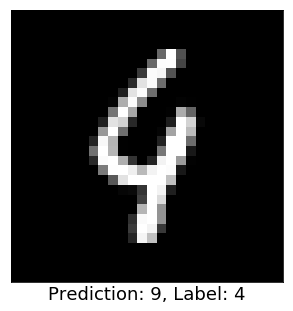

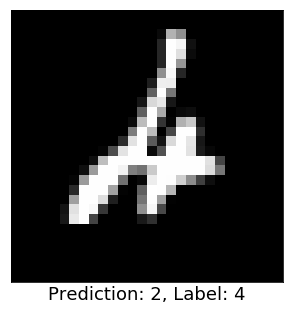

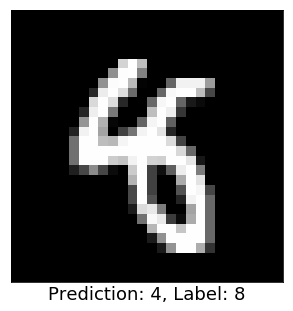

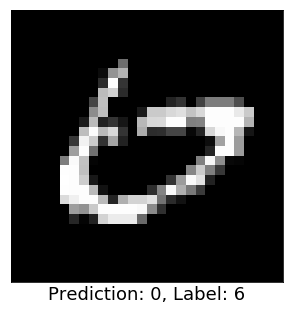

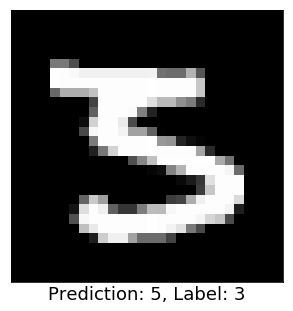

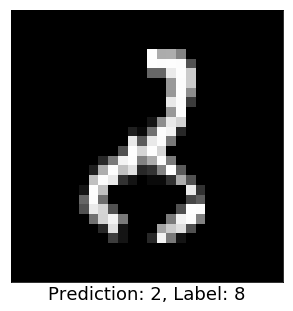

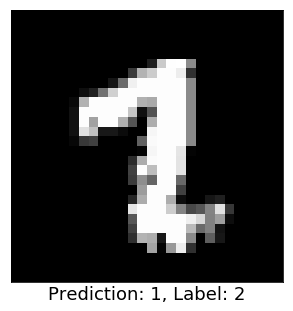

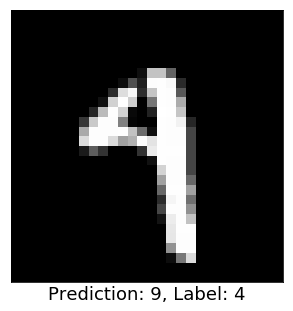

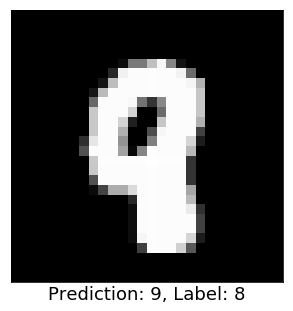

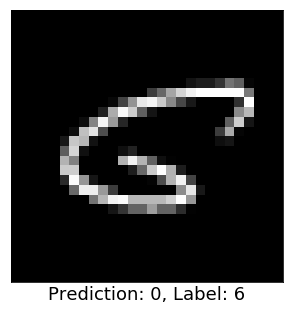

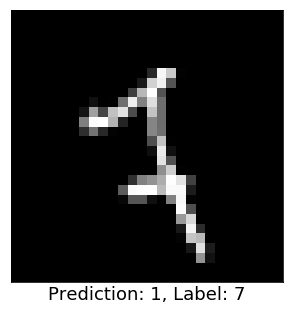

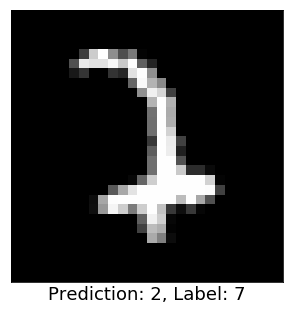

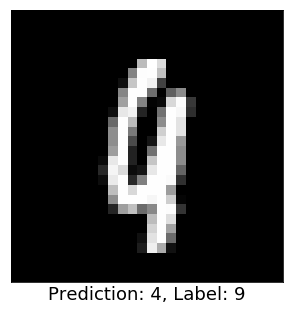

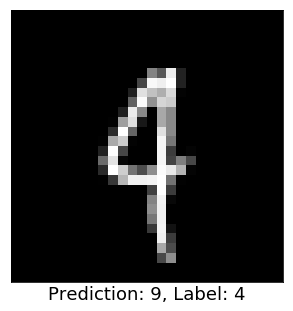

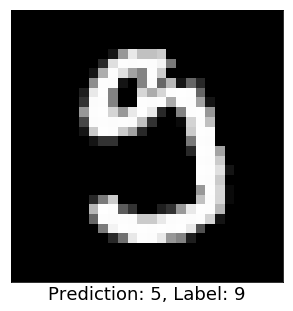

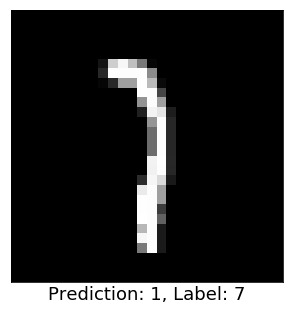

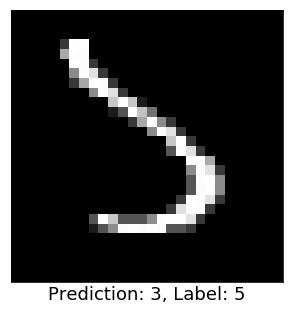

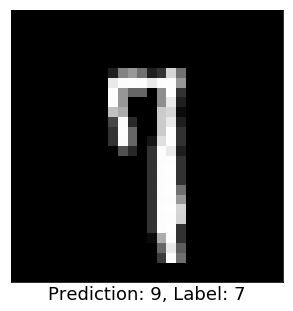

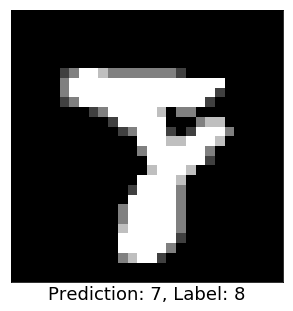

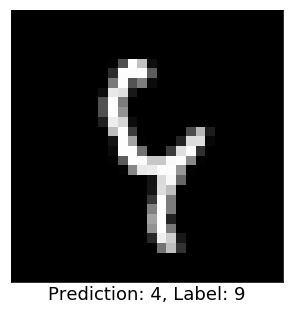

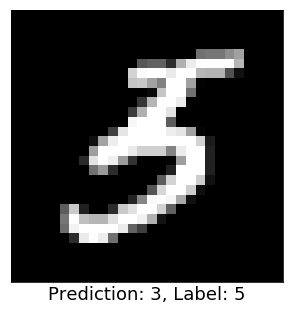

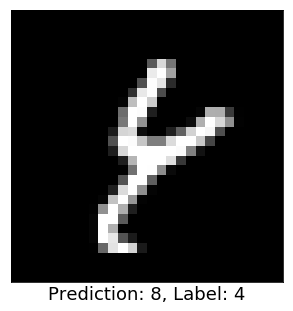

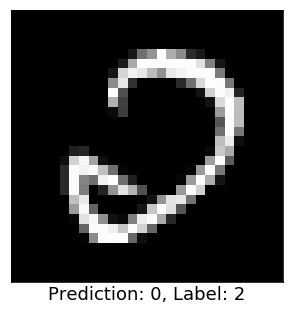

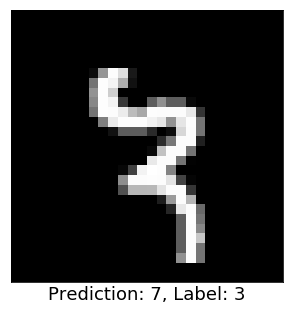

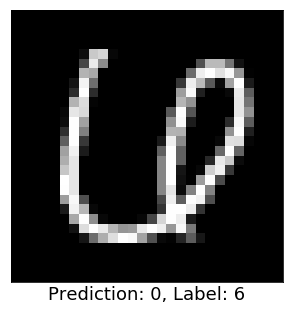

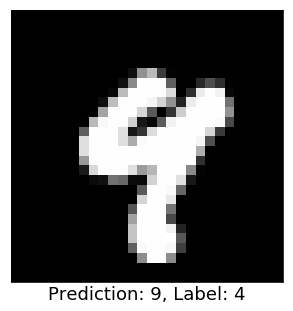

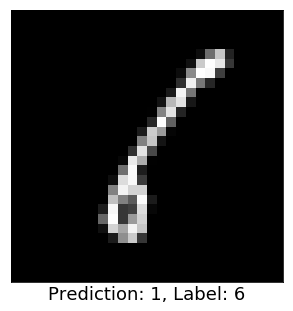

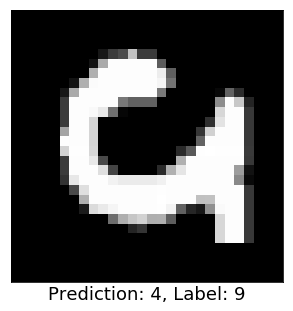

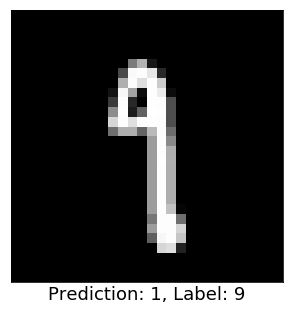

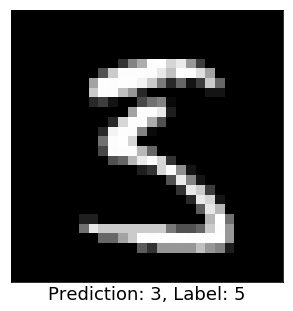

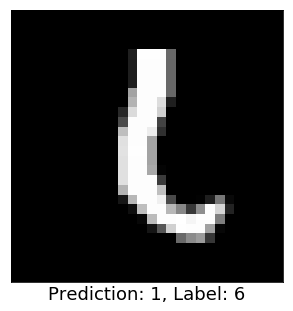

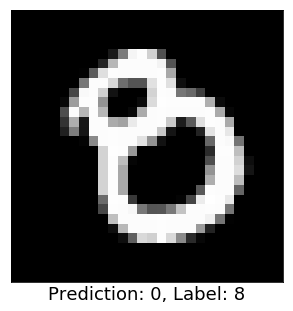

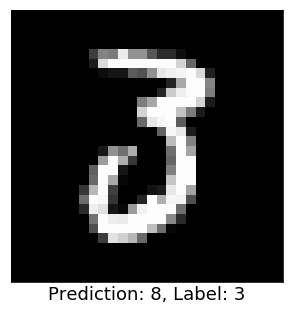

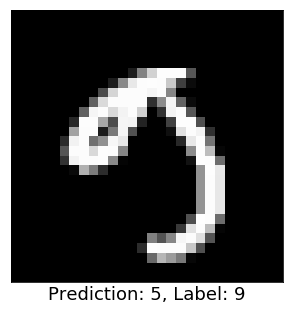

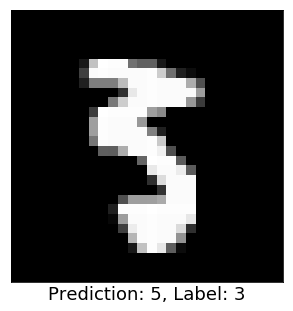

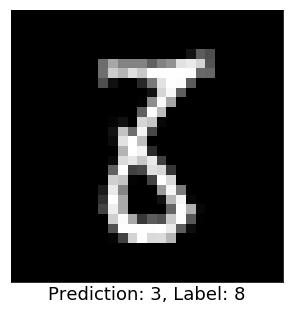

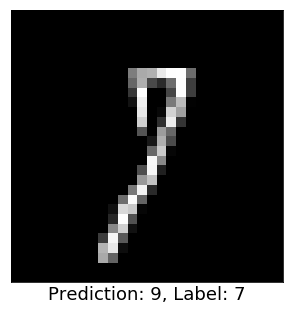

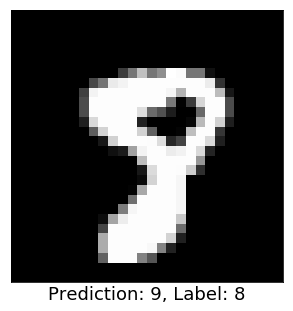

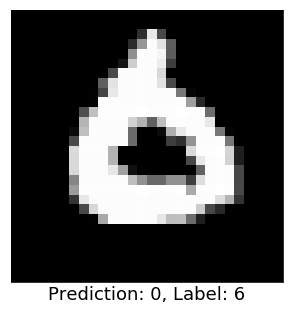

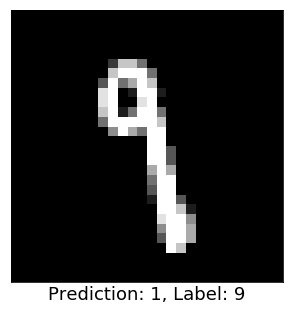

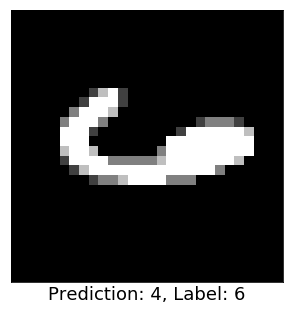

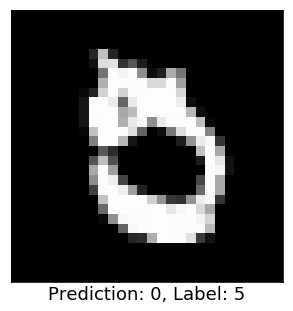

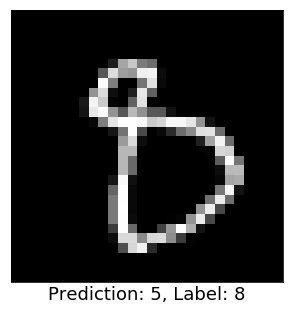

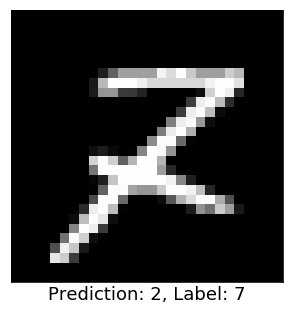

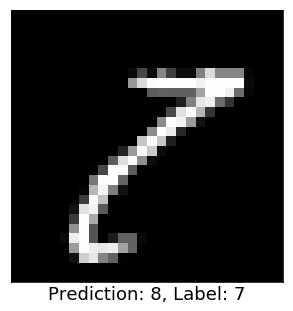

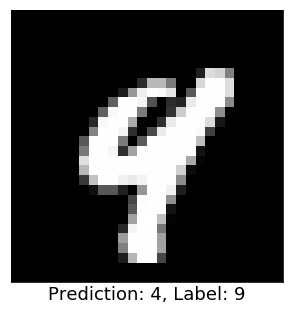

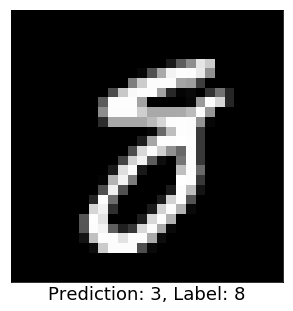

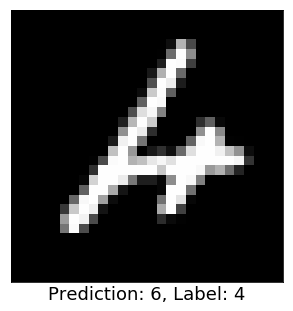

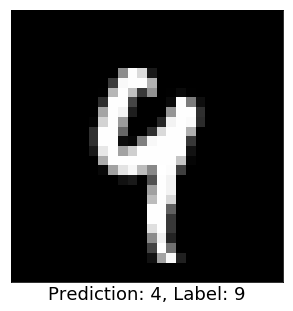

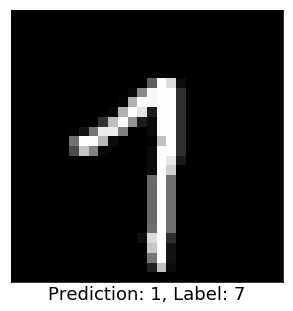

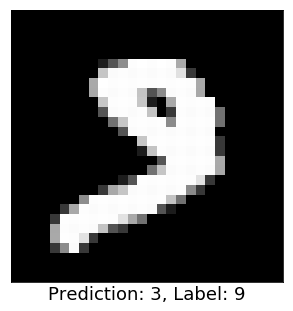

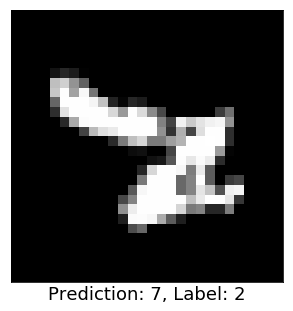

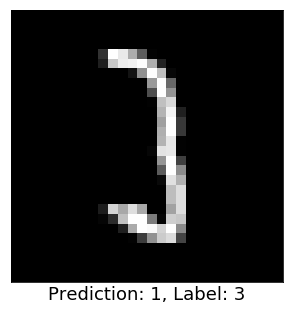

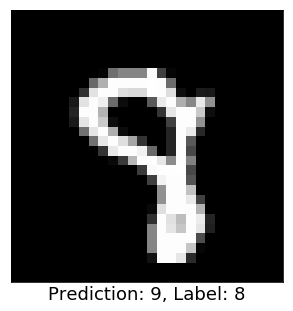

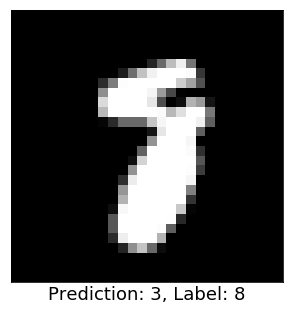

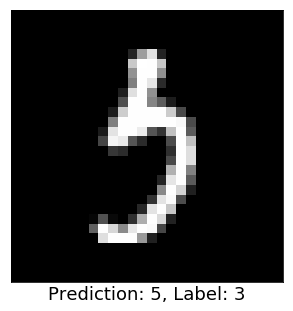

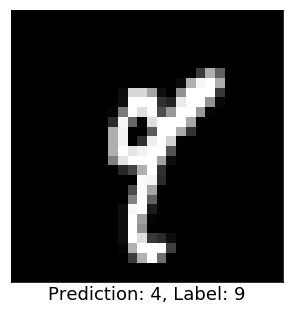

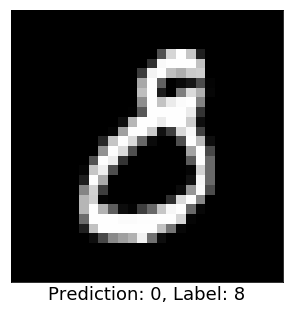

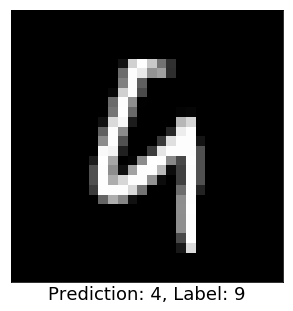

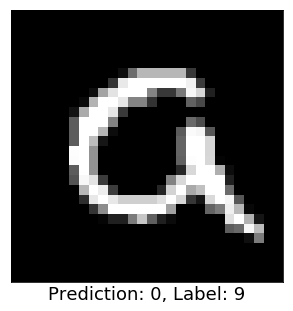

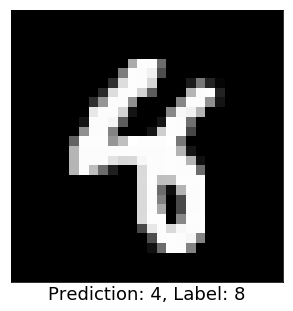

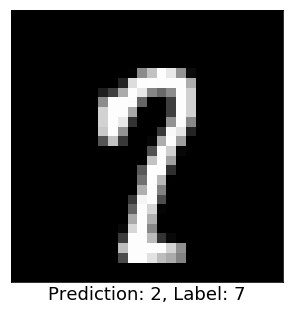

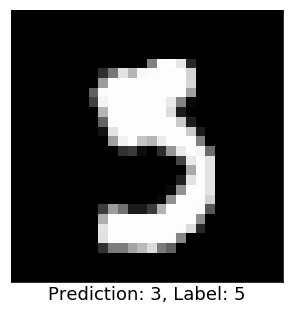

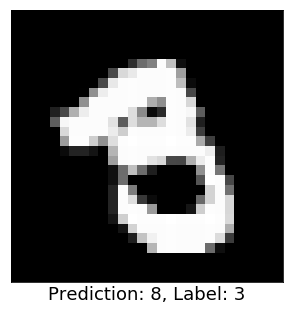

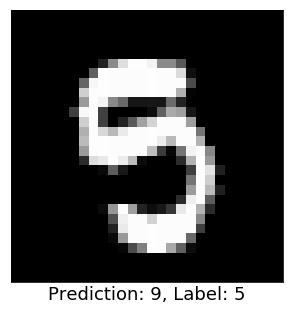

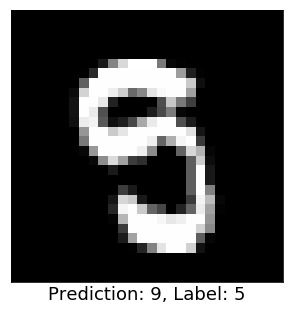

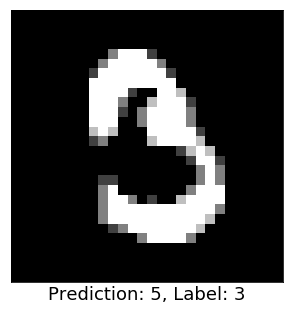

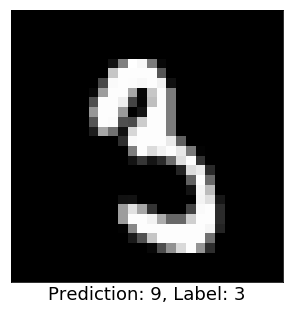

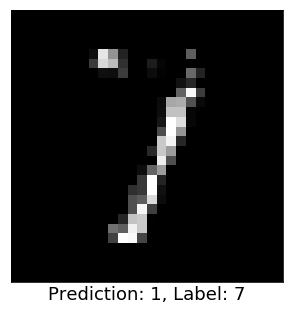

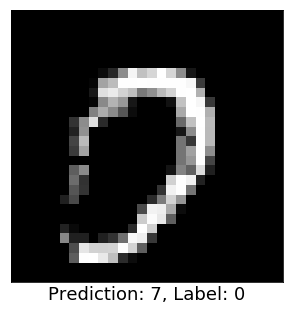

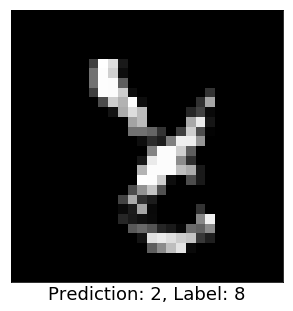

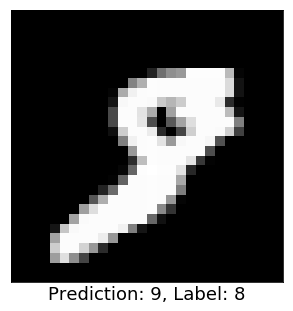

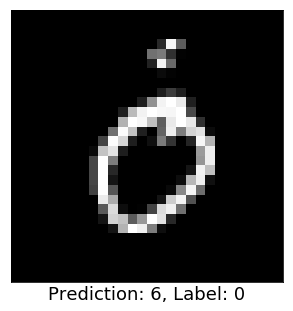

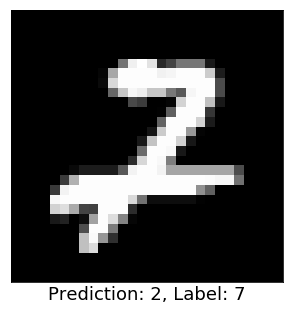

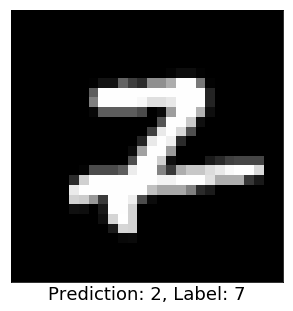

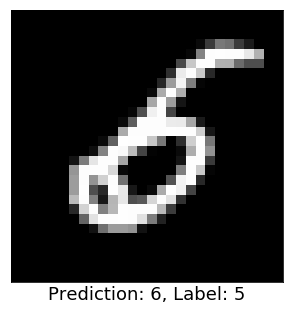

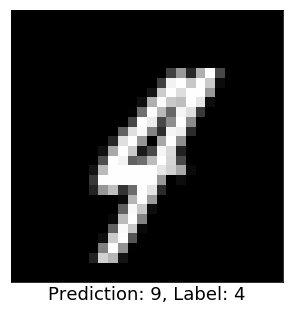

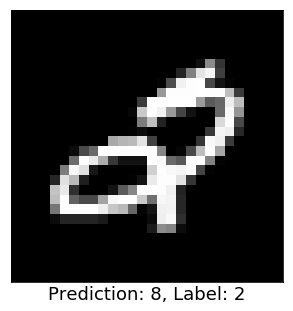

In [48]:
res = model.predict_classes(X_test[:])
plt.rcParams.update({'figure.max_open_warning' : 0}) 
results = []
for n in range(10000):
    if res[n] != y_test[n]:
        results.append((res[n], y_test[n], n))
        
print(results)

for i in range(len(results)):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_test[results[i][2], 0], cmap='gray')
    text = "Prediction: "+str(results[i][0])+", Label: "+str(results[i][1])
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel(text, fontsize=18)
